## All the figures for the paper
**05 March 2024 by MiniUFO**

---
[TOC]

---
### 1. Introduction
Following [Beron-Vera and LaCasce](https://journals.ametsoc.org/view/journals/phoc/46/7/jpo-d-15-0127.1.xml), relative dispersion analysis will be performed using GLAD drifter dataset.  Also, the newly proposed [Cumulative Inverse Separation Time (CIST)](https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/abs/relative-dispersion-with-finite-inertial-ranges/A4810AD4971C9C9FC920CE4BDAF8AE95) diagnostic will be calculated to infer the turbulent regime of the real ocean.  This notebooks contains all the figures used in the JPO paper.

---

### 2. Plot the results
#### 2.1 Load the results

In [1]:
import xarray as xr
import numpy as np
import sys
sys.path.append('../')
from core import RelativeDispersion
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2
%matplotlib inline

rd = RelativeDispersion(xpos='longitude', uvel='ve', time='time', Rearth=6371.2,
                        ypos='latitude' , vvel='vn', coord='latlon')

alpha = 1.2
rbin0 = 0.001

r0_gla = 0.13
groupG = f'{r0_gla}'
dataset = 'GLAD'
dsGRo  = xr.open_dataset(f'../data/RDstat_{dataset}_{alpha}_o{groupG}_{rbin0}.nc')
dsGRc  = xr.open_dataset(f'../data/RDstat_{dataset}_10d_{alpha}_c{groupG}_{rbin0}.nc')
dsGRa  = xr.open_dataset(f'../data/RDstat_{dataset}_10d_{alpha}_oandc{groupG}_{rbin0}.nc')
dsGRAl = xr.open_dataset(f'../data/RDstat_{dataset}_{alpha}_all_{rbin0}.nc')

rG_o = np.sqrt(dsGRo.r2)
rG_c = np.sqrt(dsGRc.r2)
rG_a = np.sqrt(dsGRa.r2)

r0_las = 0.2
groupL = f'{r0_las}'
dataset = 'LASER'
dsLRo  = xr.open_dataset(f'../data/RDstat_{dataset}rft_10d_{alpha}_o{groupL}_{rbin0}.nc')
dsLRc  = xr.open_dataset(f'../data/RDstat_{dataset}rft_10d_{alpha}_c{groupL}_{rbin0}.nc')
dsLRa  = xr.open_dataset(f'../data/RDstat_{dataset}rft_10d_{alpha}_oandc{groupL}_{rbin0}.nc')
dsLRAl = xr.open_dataset(f'../data/RDstat_{dataset}rft_10d_{alpha}_all_{rbin0}.nc')

rL_o = np.sqrt(dsLRo.r2)
rL_c = np.sqrt(dsLRc.r2)
rL_a = np.sqrt(dsLRa.r2)

tbins = rd.separation_bins(0.01 , 100, alpha, method='cist', thre=30, incre=4)
sbins = rd.separation_bins(rbin0, 800, alpha, method='cist')

#### 2.4 Plot results

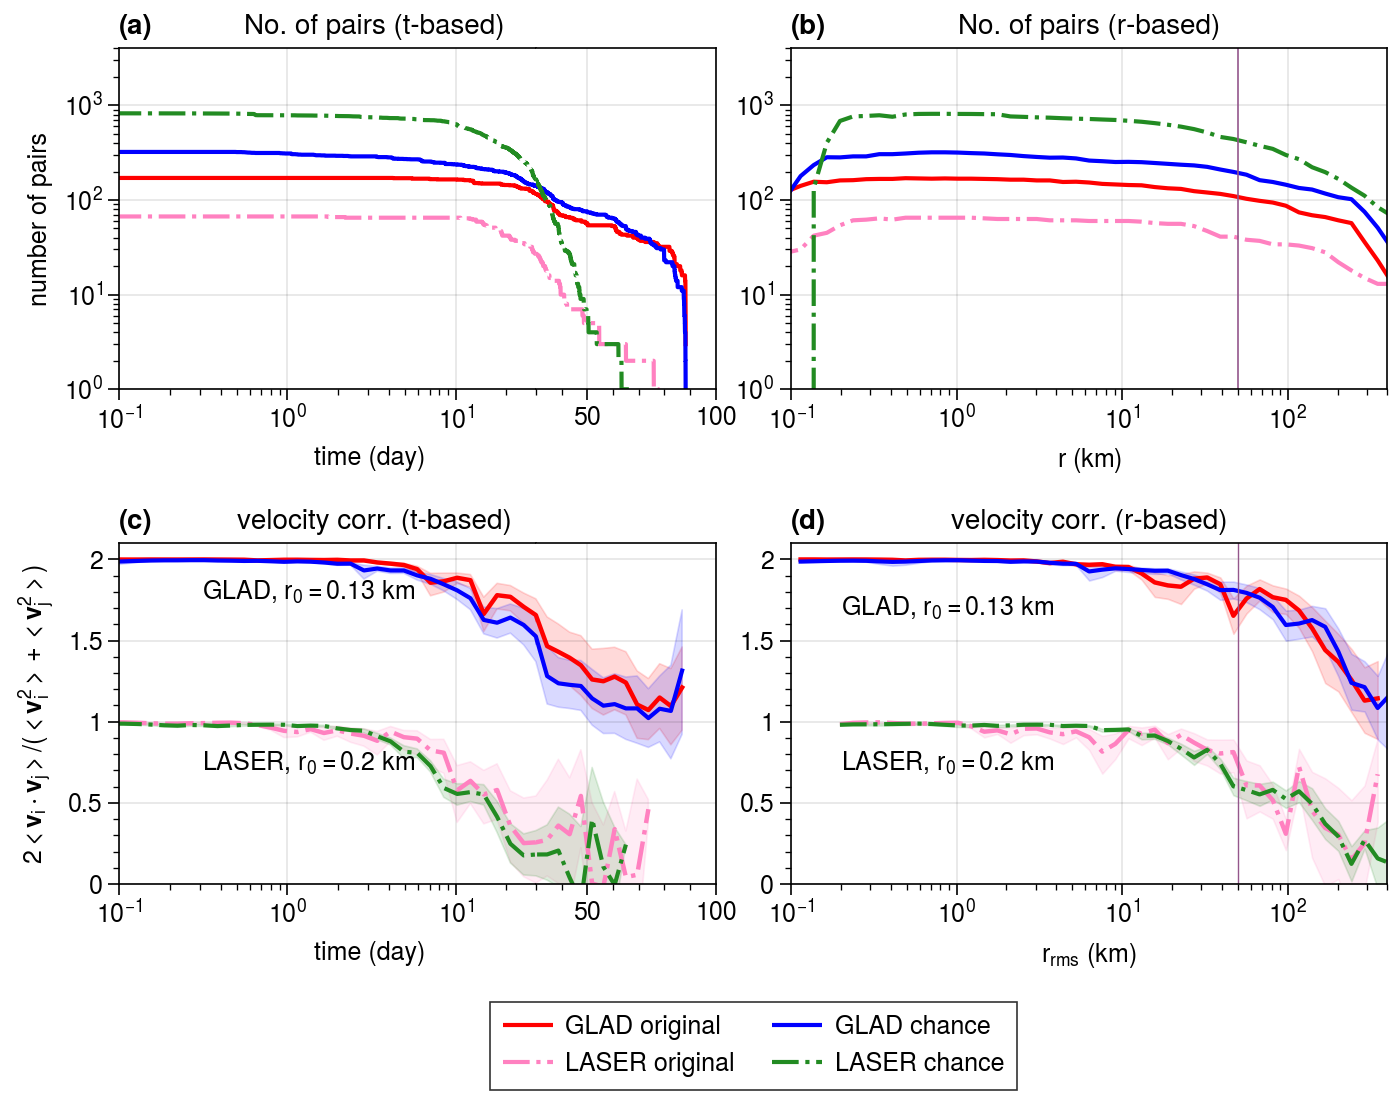

In [6]:
# velocity correlation
import proplot as pplt
from plot import panel

v1 = {'var':dsGRo.nums, 'r':rG_o, 'method':'plot', 'label':'GLAD original', 's':9, 'color':'r'}
v2 = {'var':dsGRc.nums, 'r':rG_c, 'method':'plot', 'label':'GLAD chance'  , 's':8, 'color':'b'}
v3 = {'var':dsLRo.nums, 'r':rL_o, 'method':'plot', 'label':'LASER original', 's':8, 'color':'pink', 'linestyle':'dashdot'}
v4 = {'var':dsLRc.nums, 'r':rL_c, 'method':'plot', 'label':'LASER chance'  , 's':7, 'color':'forestgreen', 'linestyle':'dashdot'}
v11 = {'var':dsGRo.nums2, 'r':dsGRo.nums2.rbin, 'method':'plot', 'label':'GLAD original', 's':9, 'color':'r', 'linestyle':'solid'}
v22 = {'var':dsGRc.nums2, 'r':dsGRc.nums2.rbin, 'method':'plot', 'label':'GLAD chance'  , 's':8, 'color':'b', 'linestyle':'solid'}
v33 = {'var':dsLRo.nums2, 'r':dsLRo.nums2.rbin, 'method':'plot', 'label':'LASER original', 's':8, 'color':'pink', 'linestyle':'dashdot'}
v44 = {'var':dsLRc.nums2, 'r':dsLRc.nums2.rbin, 'method':'plot', 'label':'LASER chance'  , 's':7, 'color':'forestgreen', 'linestyle':'dashdot'}
v111 = {'var':dsGRo.lvc+1, 'r':rG_o, 'CIs':[dsGRo.CILlv+1, dsGRo.CIUlv+1], 'method':'plot', 'label':'GLAD original', 's':9, 'color':'r', 'lw':1.6}
v222 = {'var':dsGRc.lvc+1, 'r':rG_c, 'CIs':[dsGRc.CILlv+1, dsGRc.CIUlv+1], 'method':'plot', 'label':'GLAD chance'  , 's':8, 'color':'b'}
v333 = {'var':dsLRo.lvc, 'r':rL_o, 'CIs':[dsLRo.CILlv, dsLRo.CIUlv], 'method':'plot', 'label':'LASER original', 's':8, 'color':'pink', 'lw':1.6, 'linestyle':'dashdot'}
v444 = {'var':dsLRc.lvc, 'r':rL_c, 'CIs':[dsLRc.CILlv, dsLRc.CIUlv], 'method':'plot', 'label':'LASER chance'  , 's':7, 'color':'forestgreen', 'linestyle':'dashdot'}
v555 = {'var':dsGRAl.num_fsle, 'r':dsGRAl.num_fsle.rbin, 'method':'plot', 'label':'GLAD all' , 's':8, 'color':'k'}
v666 = {'var':dsLRAl.num_fsle, 'r':dsLRAl.num_fsle.rbin, 'method':'plot', 'label':'LASER all', 's':8, 'color':'k', 'linestyle':'dashdot'}

fig, axes = pplt.subplots(nrows=2, ncols=2, figsize=(7, 5.5), facecolor='w', sharex=0, sharey=0, wspace=3)

ax = panel(axes[0,0], [v1,v2,v3,v4], [], title=f'\t\t\t\t\t\t\t\t\t\t\t\tNo. of pairs (t-based)', timebased=True, thre=30, size=0.9,
           yscale='log', xscale='semilog', ylim=[1e0, 4e3], xlim=[1e-1, 1e2], fontsize=10,
           ylabel='number of pairs', xlabel='\t\t\t\t\t\t\t\t\t\t\t\ttime (day)', loc=None)
ax = panel(axes[0,1], [v11,v22,v33,v44], [], title=f'No. of pairs (r-based)', timebased=False,
           yscale='log', xscale='log', ylim=[1e0, 4e3], xlim=[1e-1, 4e2], fontsize=10,
           ylabel='', xlabel='$r$ (km)', loc=None)
ax[0].plot([50, 50], [1, 1e6], lw=0.6, linestyle='solid', color='purple')
lgd = ax[2]
ax = panel(axes[1,0], [v111,v222,v333,v444], [], title=f'\t\t\t\t\t\t\t\t\t\t\t\tvelocity corr. (t-based)', timebased=True, thre=30, size=0.9,
           yscale='linear', xscale='semilog', ylim=[0, 2.1], xlim=[1e-1, 1e2], rebins=tbins, fontsize=10,
           ylabel='$2<\\mathbf{v}_i\\cdot \\mathbf{v}_j>/(<\\mathbf{v}_i^2>+<\\mathbf{v}_j^2>)$', xlabel='\t\t\t\t\t\t\t\t\t\t\t\ttime (day)', loc=None, ncols=1)
ax[0].text(-100, 1.75, f'GLAD, $r_0=${groupG} km', color='k')
ax[0].text(-100, 0.7, f'LASER, $r_0=${groupL} km', color='k')
ax = panel(axes[1,1], [v111,v222,v333,v444], [], title=f'velocity corr. (r-based)', timebased=False,
           yscale='linear', xscale='log', ylim=[0, 2.1], xlim=[1e-1, 4e2], rebins=sbins, fontsize=10,
           ylabel='', xlabel='$r_{rms}$ (km)', loc=None, ncols=1)
ax[0].text(0.2, 1.65, f'GLAD, $r_0=${groupG} km', color='k')
ax[0].text(0.2, 0.7, f'LASER, $r_0=${groupL} km', color='k')
ax[0].plot([50, 50], [0, 3], lw=0.5, linestyle='solid', color='purple')
lgd = [lgd[0], lgd[1], lgd[2], lgd[3]]
fig.legend(lgd, loc='b', ncols=2)
axes.format(abc='(a)')
#fig.savefig('fig02_R1.pdf', format='pdf', bbox_inches='tight')

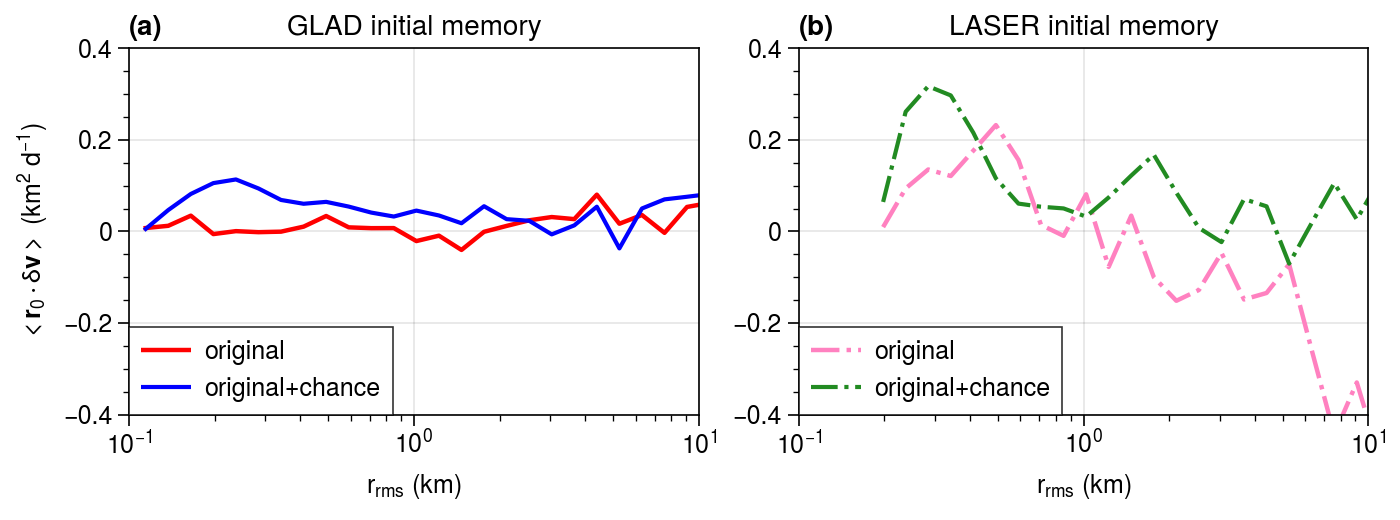

In [8]:
# initial memory
import proplot as pplt
from plot import panel

vrng = 0.4

# km m/s to km^2/d
v111 = {'var':dsGRo.initm*86.4, 'r':rG_o, 'method':'plot', 'label':'original', 's':9, 'color':'r', 'lw':1.6}
v222 = {'var':dsGRa.initm*86.4, 'r':rG_a, 'method':'plot', 'label':'original+chance' , 's':8, 'color':'b'}
v333 = {'var':dsLRo.initm*86.4, 'r':rL_o, 'method':'plot', 'label':'original', 's':8, 'color':'pink', 'lw':1.6, 'linestyle':'dashdot'}
v444 = {'var':dsLRa.initm*86.4, 'r':rL_a, 'method':'plot', 'label':'original+chance' , 's':7, 'color':'forestgreen', 'linestyle':'dashdot'}

v555 = {'var':dsGRo.aniab, 'r':rG_o, 'method':'plot', 'label':'original', 's':9, 'color':'r', 'lw':1.6}
v666 = {'var':dsGRa.aniab, 'r':rG_a, 'method':'plot', 'label':'original+chance' , 's':8, 'color':'b'}
v777 = {'var':dsLRo.aniab, 'r':rL_o, 'method':'plot', 'label':'original', 's':8, 'color':'pink', 'lw':1.6, 'linestyle':'dashdot'}
v888 = {'var':dsLRa.aniab, 'r':rL_a, 'method':'plot', 'label':'original+chance' , 's':7, 'color':'forestgreen', 'linestyle':'dashdot'}

fig, axes = pplt.subplots(nrows=1, ncols=2, figsize=(7, 2.6), facecolor='w', sharex=0, sharey=0, wspace=4)


ax = panel(axes[0,0], [v111,v222], [], title=f'GLAD initial memory', timebased=False,
           yscale='linear', xscale='log', ylim=[-vrng, vrng], xlim=[1e-1, 1e1], rebins=sbins, fontsize=10,
           ylabel='$<\\mathbf{r}_0\\cdot\\delta \\mathbf{v}>$ ($km^2$ $d^{-1}$)', xlabel='$r_{rms}$ (km)', loc='ll', ncols=1)
ax = panel(axes[0,1], [v333,v444], [], title=f'LASER initial memory', timebased=False,
           yscale='linear', xscale='log', ylim=[-vrng, vrng], xlim=[1e-1, 1e1], rebins=sbins, fontsize=10,
           ylabel='', xlabel='$r_{rms}$ (km)', loc='ll', ncols=1)
#ax = panel(axes[1,0], [v555,v666], [], title=f'GLAD anisotropy', timebased=False,
#           yscale='linear', xscale='log', ylim=[0, 10], xlim=[1e-1, 1e1], rebins=sbins, fontsize=10,
#           ylabel='$(<r_a^2>/<r_b^2>)^{1/2}$', xlabel='$r_{rms}$ (km)', loc='ul', ncols=1)
#ax = panel(axes[1,1], [v777,v888], [], title=f'LASER anisotropy', timebased=False,
#           yscale='linear', xscale='log', ylim=[0, 10], xlim=[1e-1, 1e1], rebins=sbins, fontsize=10,
#           ylabel='', xlabel='$r_{rms}$ (km)', loc='ur', ncols=1)

axes.format(abc='(a)')
#fig.savefig('fig07.pdf', format='pdf', bbox_inches='tight')

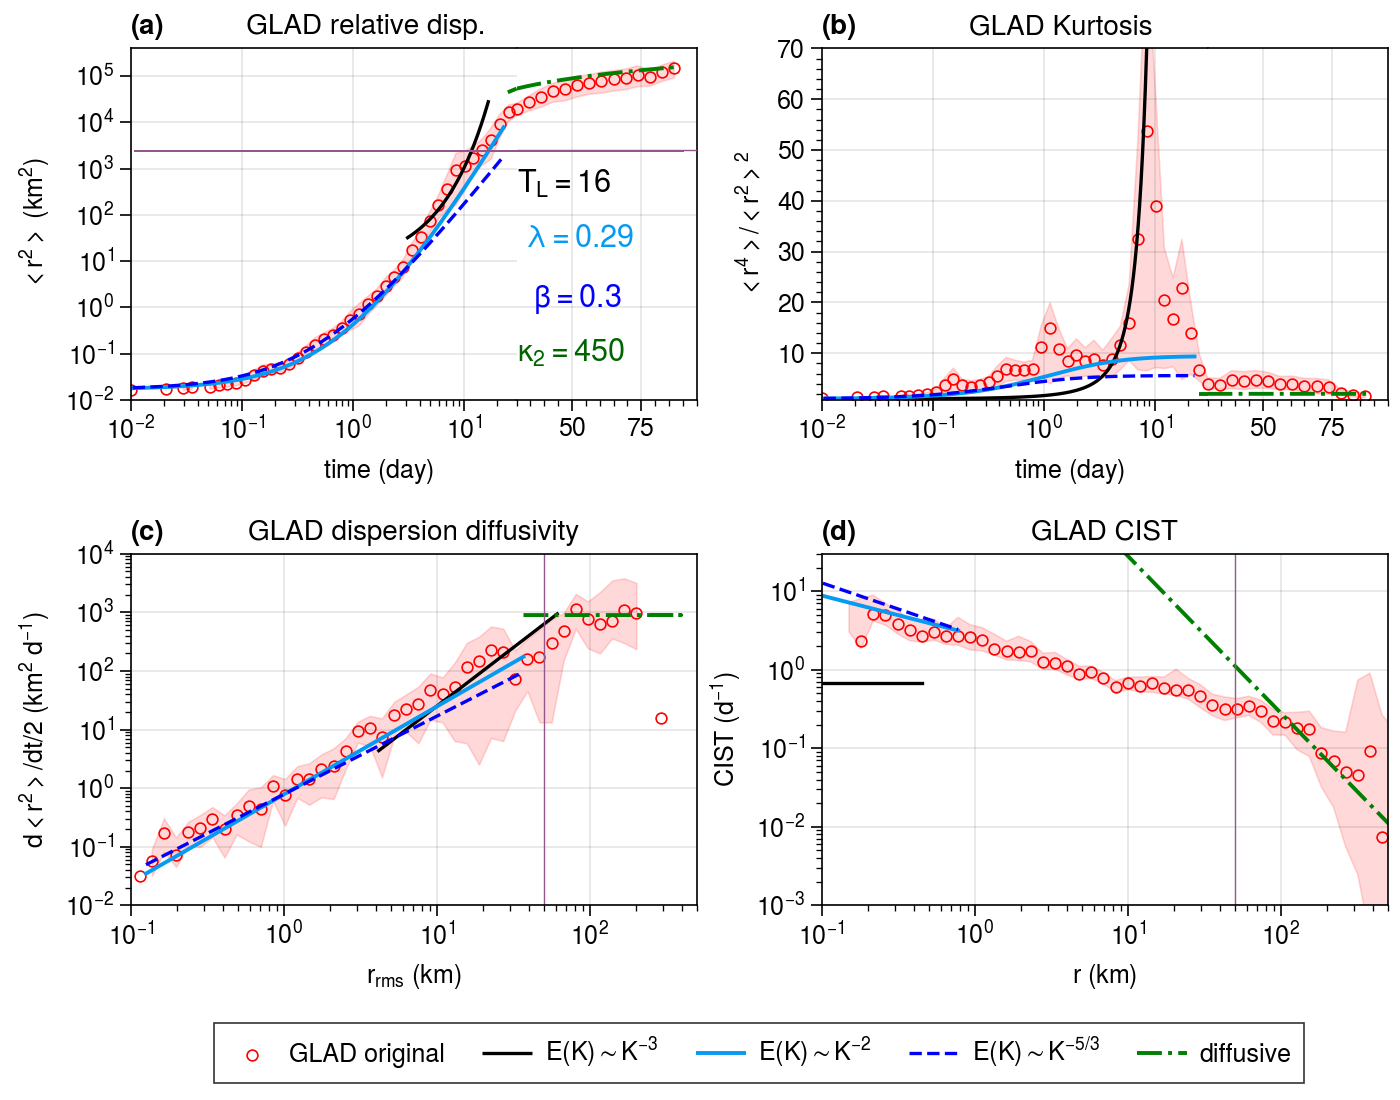

In [2]:
# RD, K2, Kurtosis, CIST for GLAD original
import proplot as pplt
from plot import panel

sz, lw = 15, 0.6

fig, axes = pplt.subplots(nrows=2, ncols=2, figsize=(7, 5.5), facecolor='w', sharex=0, sharey=0, wspace=5)

offst = 400
params1 = {'T':16, 'beta':0.3, 'k2':450, 'r0':r0_gla, 'lambda':0.29}

def addTexts(ax, x, y, params):
    ax.text(x, y      , f'$T_L={params["T"]}$'            , fontsize=11, color='k')
    ax.text(x, y/1.5e1, f' $\\lambda={params["lambda"]}$' , fontsize=11, color='azure')
    ax.text(x, y/3e2  , f'  $\\beta={params["beta"]}$'    , fontsize=11, color='b')
    ax.text(x, y/4.5e3, f'$\\kappa_2={params["k2"]}$'     , fontsize=11, color='darkgreen')

r2_lund1 = rd.analytic_r2(rG_o, params1, 'Lundgren')
r2_Rich1 = rd.analytic_r2(rG_o, params1, 'Richardson')
r2_Rayl1 = rd.analytic_r2(rG_o, params1, 'Rayleigh')
r2_GM1   = rd.analytic_r2(rG_o, params1, '-2')
K2_lund1 = rd.analytic_K2(rG_o, params1, 'Lundgren')
K2_Rich1 = rd.analytic_K2(rG_o, params1, 'Richardson')
K2_Rayl1 = rd.analytic_K2(rG_o, params1, 'Rayleigh')
K2_GM1   = rd.analytic_K2(rG_o, params1, '-2')
Ku_lund1 = rd.analytic_Kurtosis(rG_o, params1, 'Lundgren')
Ku_Rich1 = rd.analytic_Kurtosis(rG_o, params1, 'Richardson')
Ku_Rayl1 = rd.analytic_Kurtosis(rG_o, params1, 'Rayleigh')
Ku_GM1   = rd.analytic_Kurtosis(rG_o, params1, '-2')
ci_lund1 = rd.analytic_CIST(dsGRo.r, alpha, params1, 'Lundgren')
ci_Rich1 = rd.analytic_CIST(dsGRo.r, alpha, params1, 'Richardson-a')
ci_Rayl1 = rd.analytic_CIST(dsGRo.r, alpha, params1, 'Rayleigh-a')
ci_GM1   = rd.analytic_CIST(dsGRo.r, alpha, params1, '-2-a')

v111 = {'var':dsGRo.r2, 'r':rG_o, 'CIs':[dsGRo.CILr, dsGRo.CIUr], 'method':'scatter', 'label':'GLAD dataset', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v115 = {'var':r2_lund1[300:1600]*offst, 'r':rG_o[300:1600], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid', 'color':'k'}
v116 = {'var':r2_Rich1[:2200], 'r':rG_o[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v117 = {'var':r2_Rayl1[2400:], 'r':rG_o[2400:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'g'}
v118 = {'var':r2_GM1[:2200]  , 'r':rG_o[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

v121 = {'var':dsGRo.Ku, 'r':rG_o, 'CIs':[dsGRo.CILKu, dsGRo.CIUKu], 'method':'scatter', 'label':'GLAD dataset', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v125 = {'var':Ku_lund1[:900] , 'r':rG_o[:900] , 'method':'plot', 'label':'$E(K)\\sim K^{-3}$'  , 'lw':1.2, 'linestyle':'solid' , 'color':'k'}
v126 = {'var':Ku_Rich1[:2200], 'r':rG_o[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v127 = {'var':Ku_Rayl1[2400:], 'r':rG_o[2400:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'g'}
v128 = {'var':Ku_GM1[:2200]  , 'r':rG_o[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

RCILK2_o1, RCIUK2_o1 = dsGRo.CILK2t.where(dsGRo.CILK2t>0).interpolate_na('time'), dsGRo.CIUK2t.where(dsGRo.CIUK2t>0).interpolate_na('time')

v131 = {'var':dsGRo.K2t, 'r':rG_o, 'CIs':[RCILK2_o1, RCIUK2_o1], 'method':'scatter', 'label':'GLAD dataset', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v135 = {'var':K2_lund1[360:1800], 'r':rG_o[360:1800], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid', 'color':'k'}
v136 = {'var':K2_Rich1[:1200], 'r':rG_o[:1200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v137 = {'var':K2_Rayl1[1200:], 'r':rG_o[1200:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'g'}
v138 = {'var':K2_GM1[:1200]  , 'r':rG_o[:1200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

RCILci_o1, RCIUci_o1 = dsGRo.CILci, dsGRo.CIUci

v141 = {'var':dsGRo.cist1, 'r':dsGRo.r, 'CIs':[RCILci_o1, RCIUci_o1], 'method':'scatter', 'label':'GLAD original', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v145 = {'var':ci_lund1[19:34], 'r':dsGRo.r[19:34], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$'  , 'lw':1.2, 'linestyle':'solid' , 'color':'k'}
v146 = {'var':ci_Rich1[:37]  , 'r':dsGRo.r[:37]  , 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v147 = {'var':ci_Rayl1[35:]  , 'r':dsGRo.r[35:]  , 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'g'}
v148 = {'var':ci_GM1[:37]    , 'r':dsGRo.r[:37]  , 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

ax = panel(axes[0,0], [v111], [v115,v118,v116,v117], title=' \t\t\t\t\t\t\t\t\t GLAD relative disp.', timebased=True, yscale='log', xscale='semilog',
           ylim=[1e-2, 4e5], xlim=[1e-2, 95], rebins=tbins, ylabel='$<r^2>$ ($km^2$)', xlabel='                $time$ (day)', loc=None, fontsize=10, thre=30, size=0.9)
addTexts(ax[1], 30, 3e2, params1)
ax[1].text(-108, 1700, '——————————————————————', color='purple')
ax[0].plot([-100, 1e3], [2500, 2500], lw=0.5, linestyle='solid', color='purple', zorder=5)
ax = panel(axes[0,1], [v121], [v125,v128,v126,v127], title=' \t\t\t\t\t\t\t\t\t\t GLAD Kurtosis', timebased=True, yscale='linear', xscale='semilog',
           ylim=[8e-1, 70], xlim=[1e-2, 95], rebins=tbins, ylabel='$<r^4>/<r^2>^2$', xlabel='                $time$ (day)', loc=None, fontsize=10, thre=30, size=0.9)
ax = panel(axes[1,0], [v131], [v135,v138,v136,v137], title=f'GLAD dispersion diffusivity', timebased=False, yscale='log', xscale='log',
           ylim=[1e-2, 1e4], xlim=[1e-1, 5e2], rebins=sbins, ylabel='$d<r^2>/dt/2$ ($km^2$ $d^{-1}$)', xlabel='$r_{rms}$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [1e-5, 1e4], lw=0.5, linestyle='solid', color='purple')
ax = panel(axes[1,1], [v141], [v145,v148,v146,v147], title=f'GLAD CIST', timebased=False, yscale='log', xscale='log',
           ylim=[1e-3, 3e1], xlim=[1e-1, 5e2], ylabel='CIST ($d^{-1}$)', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [1e-5, 2e2], lw=0.5, linestyle='solid', color='purple')
lgd = ax[2]
fig.legend(lgd, loc='b', ncols=5)
axes.format(abc='(a)')
#fig.savefig('fig03.pdf', format='pdf', bbox_inches='tight')

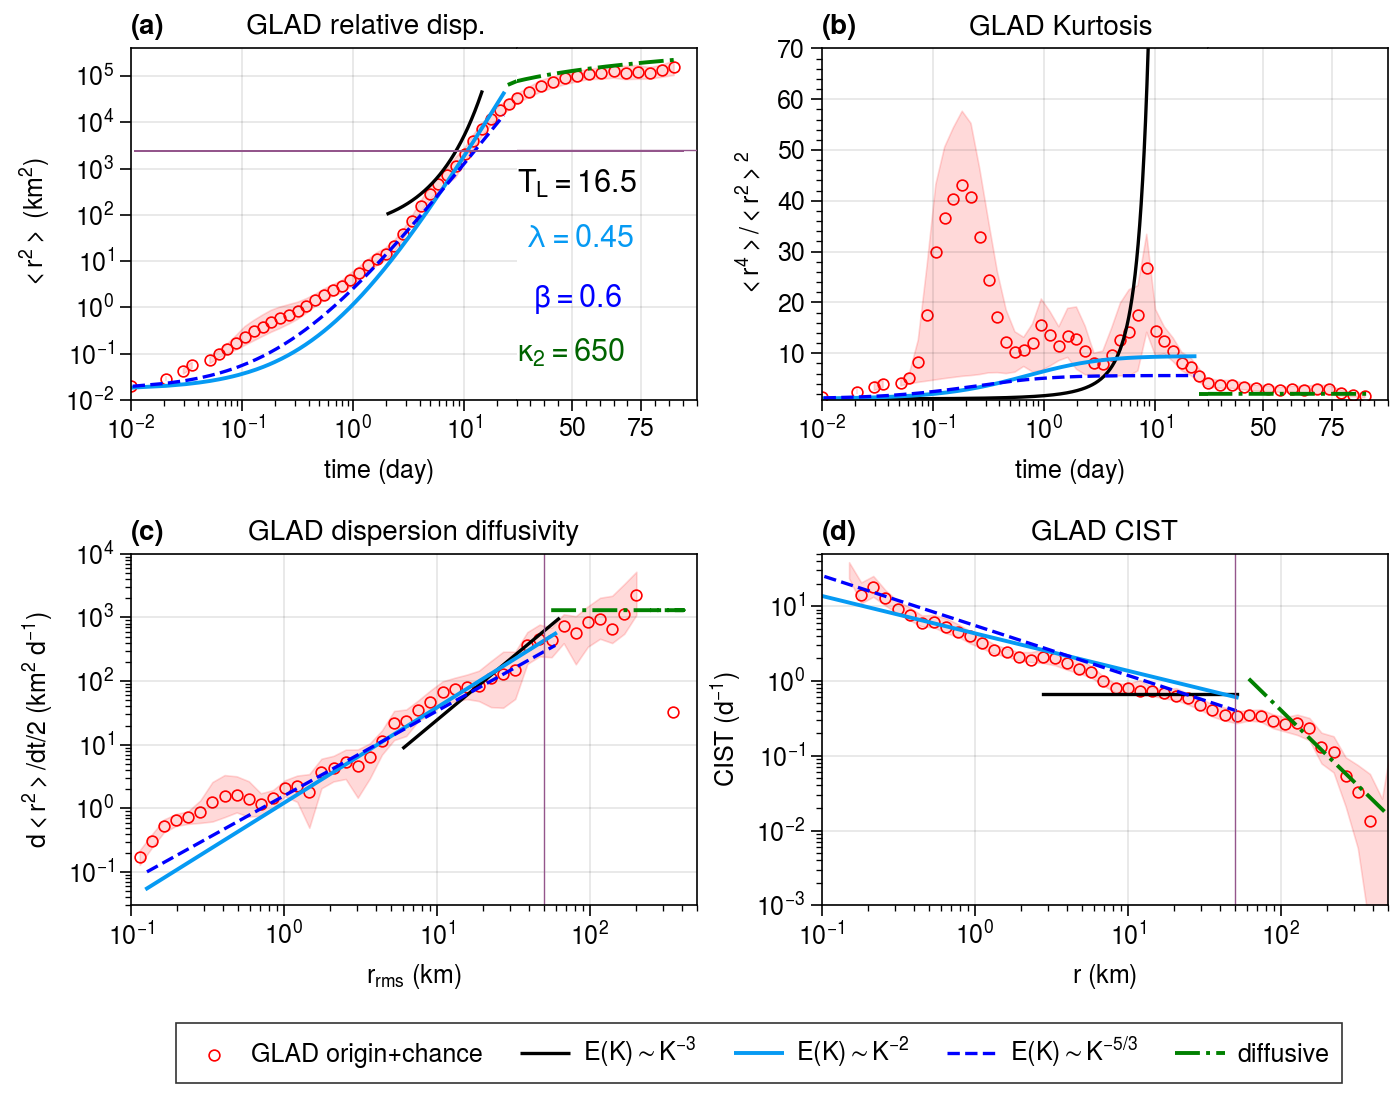

In [3]:
# RD, K2, Kurtosis, CIST for GLAD chance
import proplot as pplt
from plot import panel

sz, lw = 15, 0.6

fig, axes = pplt.subplots(nrows=2, ncols=2, figsize=(7, 5.5), facecolor='w', sharex=0, sharey=0, wspace=5)

offst = 2300
#params1 = {'T':16.5, 'beta':0.75, 'k2':950, 'r0':r0_gla, 'lambda':0.55}
params1 = {'T':16.5, 'beta':0.6, 'k2':650, 'r0':r0_gla, 'lambda':0.45}

def addTexts(ax, x, y, params):
    ax.text(x, y      , f'$T_L={params["T"]}$'            , fontsize=11, color='k')
    ax.text(x, y/1.5e1, f' $\\lambda={params["lambda"]}$' , fontsize=11, color='azure')
    ax.text(x, y/3e2  , f'  $\\beta={params["beta"]}$'    , fontsize=11, color='b')
    ax.text(x, y/4.5e3, f'$\\kappa_2={params["k2"]}$'     , fontsize=11, color='darkgreen')

r2_lund1 = rd.analytic_r2(rG_a, params1, 'Lundgren')
r2_Rich1 = rd.analytic_r2(rG_a, params1, 'Richardson')
r2_Rayl1 = rd.analytic_r2(rG_a, params1, 'Rayleigh')
r2_GM1   = rd.analytic_r2(rG_a, params1, '-2')
K2_lund1 = rd.analytic_K2(rG_a, params1, 'Lundgren')
K2_Rich1 = rd.analytic_K2(rG_a, params1, 'Richardson')
K2_Rayl1 = rd.analytic_K2(rG_a, params1, 'Rayleigh')
K2_GM1   = rd.analytic_K2(rG_a, params1, '-2')
Ku_lund1 = rd.analytic_Kurtosis(rG_a, params1, 'Lundgren')
Ku_Rich1 = rd.analytic_Kurtosis(rG_a, params1, 'Richardson')
Ku_Rayl1 = rd.analytic_Kurtosis(rG_a, params1, 'Rayleigh')
Ku_GM1   = rd.analytic_Kurtosis(rG_a, params1, '-2')
ci_lund1 = rd.analytic_CIST(dsGRa.r, alpha, params1, 'Lundgren')
ci_Rich1 = rd.analytic_CIST(dsGRa.r, alpha, params1, 'Richardson-a')
ci_Rayl1 = rd.analytic_CIST(dsGRa.r, alpha, params1, 'Rayleigh-a')
ci_GM1   = rd.analytic_CIST(dsGRa.r, alpha, params1, '-2-a')

v111 = {'var':dsGRa.r2, 'r':rG_a, 'CIs':[dsGRa.CILr, dsGRa.CIUr], 'method':'scatter', 'label':'GLAD dataset', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v115 = {'var':r2_lund1[200:1400]*offst, 'r':rG_a[200:1400], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid', 'color':'k'}
v116 = {'var':r2_Rich1[:2200], 'r':rG_a[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v117 = {'var':r2_Rayl1[2400:], 'r':rG_a[2400:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'g'}
v118 = {'var':r2_GM1[:2200]  , 'r':rG_a[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

v121 = {'var':dsGRa.Ku, 'r':rG_a, 'CIs':[dsGRa.CILKu, dsGRa.CIUKu], 'method':'scatter', 'label':'GLAD dataset', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v125 = {'var':Ku_lund1[:1500] , 'r':rG_a[:1500] , 'method':'plot', 'label':'$E(K)\\sim K^{-3}$'  , 'lw':1.2, 'linestyle':'solid' , 'color':'k'}
v126 = {'var':Ku_Rich1[:2200], 'r':rG_a[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v127 = {'var':Ku_Rayl1[2400:], 'r':rG_a[2400:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'g'}
v128 = {'var':Ku_GM1[:2200]  , 'r':rG_a[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

RCILK2_a1, RCIUK2_a1 = dsGRa.CILK2t.where(dsGRa.CILK2t>0).interpolate_na('time'), dsGRa.CIUK2t.where(dsGRa.CIUK2t>0).interpolate_na('time')

v131 = {'var':dsGRa.K2t, 'r':rG_a, 'CIs':[RCILK2_a1, RCIUK2_a1], 'method':'scatter', 'label':'GLAD dataset', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v135 = {'var':K2_lund1[300:1300], 'r':rG_a[300:1300], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid', 'color':'k'}
v136 = {'var':K2_Rich1[:1250], 'r':rG_a[:1250], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v137 = {'var':K2_Rayl1[1200:], 'r':rG_a[1200:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'g'}
v138 = {'var':K2_GM1[:1250]  , 'r':rG_a[:1250], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

RCILci_a1, RCIUci_a1 = dsGRa.CILci, dsGRa.CIUci

v141 = {'var':dsGRa.cist1, 'r':dsGRa.r, 'CIs':[RCILci_a1, RCIUci_a1], 'method':'scatter', 'label':'GLAD origin+chance', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v145 = {'var':ci_lund1[43:60], 'r':dsGRa.r[43:60], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$'  , 'lw':1.2, 'linestyle':'solid' , 'color':'k'}
v146 = {'var':ci_Rich1[:60]  , 'r':dsGRa.r[:60]  , 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v147 = {'var':ci_Rayl1[60:]  , 'r':dsGRa.r[60:]  , 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'g'}
v148 = {'var':ci_GM1[:60]    , 'r':dsGRa.r[:60]  , 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

ax = panel(axes[0,0], [v111], [v115,v118,v116,v117], title=' \t\t\t\t\t\t\t\t\t GLAD relative disp.', timebased=True, yscale='log', xscale='semilog',
           ylim=[1e-2, 4e5], xlim=[1e-2, 95], rebins=tbins, ylabel='$<r^2>$ ($km^2$)', xlabel='                $time$ (day)', loc=None, fontsize=10, thre=30, size=0.9)
addTexts(ax[1], 30, 3e2, params1)
ax[1].text(-108, 1700, '——————————————————————', color='purple')
ax[0].plot([-100, 1e3], [2500, 2500], lw=0.5, linestyle='solid', color='purple', zorder=5)
ax = panel(axes[0,1], [v121], [v125,v128,v126,v127], title=' \t\t\t\t\t\t\t\t\t\t GLAD Kurtosis', timebased=True, yscale='linear', xscale='semilog',
           ylim=[8e-1, 70], xlim=[1e-2, 95], rebins=tbins, ylabel='$<r^4>/<r^2>^2$', xlabel='                $time$ (day)', loc=None, fontsize=10, thre=30, size=0.9)
ax = panel(axes[1,0], [v131], [v135,v138,v136,v137], title=f'GLAD dispersion diffusivity', timebased=False, yscale='log', xscale='log',
           ylim=[3e-2, 1e4], xlim=[1e-1, 5e2], rebins=sbins, ylabel='$d<r^2>/dt/2$ ($km^2$ $d^{-1}$)', xlabel='$r_{rms}$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [1e-5, 1e4], lw=0.5, linestyle='solid', color='purple')
ax = panel(axes[1,1], [v141], [v145,v148,v146,v147], title=f'GLAD CIST', timebased=False, yscale='log', xscale='log',
           ylim=[1e-3, 5e1], xlim=[1e-1, 5e2], ylabel='CIST ($d^{-1}$)', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [1e-5, 2e2], lw=0.5, linestyle='solid', color='purple')
lgd = ax[2]
fig.legend(lgd, loc='b', ncols=5)
axes.format(abc='(a)')
#fig.savefig('fig05.pdf', format='pdf', bbox_inches='tight')

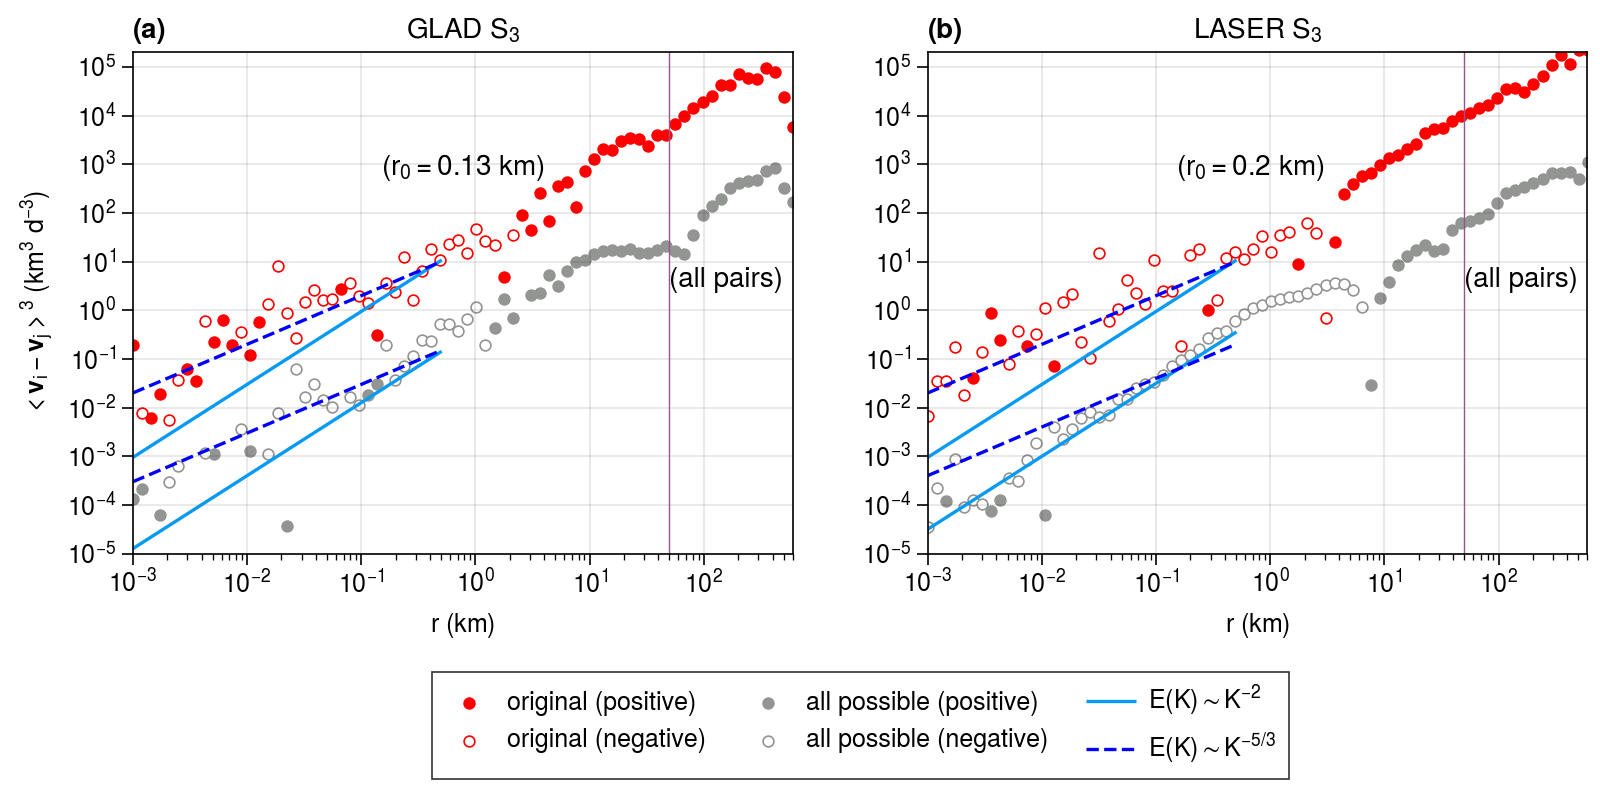

In [14]:
# S2, S3, FSLE for GLAD
import proplot as pplt
from plot import panel

unitscale2 = (86.4)**2.0
unitscale3 = (86.4)**3.0
sz, lw = 15, 0.6

vS3G1p = {'var': dsGRo.S3r.where(dsGRo.S3r>0)*unitscale3, 'r':dsGRo.rbin , 'method':'scatter', 'label':'original (positive)', 's':sz, 'lw':lw, 'color':'r'}
vS3G2p = {'var': dsGRa.S3r.where(dsGRa.S3r>0)*unitscale3, 'r':dsGRa.rbin , 'method':'scatter', 'label':'original+chance (positive)'  , 's':sz+1, 'lw':lw, 'color':'forestgreen', 'marker':'x'}
vS3G3p = {'var': dsGRAl.S3.where(dsGRAl.S3>0)*unitscale3/100, 'r':dsGRAl.rbin, 'method':'scatter', 'label':'all possible (positive)', 's':sz, 'lw':lw, 'color':'gray'}
vS3G1n = {'var': -dsGRo.S3r.where(dsGRo.S3r<0)*unitscale3, 'r':dsGRo.rbin , 'method':'scatter', 'label':'original (negative)', 's':sz, 'lw':lw, 'edgecolor':'r', 'facecolor':'white'}
vS3G2n = {'var': -dsGRa.S3r.where(dsGRa.S3r<0)*unitscale3, 'r':dsGRa.rbin , 'method':'scatter', 'label':'original+chance (negative)'  , 's':sz+2, 'lw':lw, 'color':'forestgreen', 'marker':'*'}
vS3G3n = {'var': -dsGRAl.S3.where(dsGRo.S3r<0)*unitscale3/100, 'r':dsGRAl.rbin, 'method':'scatter', 'label':'all possible (negative)', 's':sz, 'lw':lw, 'facecolor':'white', 'edgecolor':'gray'}
vS3G5 = {'var': dsGRAl.rbin[:35]**1.5*3e1, 'r':dsGRAl.rbin[:35], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.2, 'color':'azure', 'linestyle':'solid'}
vS3G6 = {'var': dsGRAl.rbin[:35]**1.0*2e1, 'r':dsGRAl.rbin[:35], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'color':'b', 'linestyle':'dashed'}
vS3G55= {'var': dsGRAl.rbin[:35]**1.5*4e1/100, 'r':dsGRAl.rbin[:35], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.2, 'color':'azure', 'linestyle':'solid'}
vS3G66= {'var': dsGRAl.rbin[:35]**1.0*3e1/100, 'r':dsGRAl.rbin[:35], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'color':'b', 'linestyle':'dashed'}


vS3L1p = {'var': dsLRo.S3r.where(dsLRo.S3r>0)*unitscale3, 'r':dsLRo.rbin , 'method':'scatter', 'label':'LASER original', 's':sz, 'lw':lw, 'color':'r'}
vS3L2p = {'var': dsLRa.S3r.where(dsLRa.S3r>0)*unitscale3, 'r':dsLRa.rbin , 'method':'scatter', 'label':'LASER chance'  , 's':sz+1, 'lw':lw, 'color':'forestgreen', 'marker':'x'}
vS3L3p = {'var': dsLRAl.S3.where(dsLRAl.S3>0)*unitscale3/100, 'r':dsLRAl.rbin, 'method':'scatter', 'label':'LASER all', 's':sz, 'lw':lw, 'color':'gray'}
vS3L1n = {'var': -dsLRo.S3r.where(dsLRo.S3r<0)*unitscale3, 'r':dsLRo.rbin , 'method':'scatter', 'label':'LASER original', 's':sz, 'lw':lw, 'edgecolor':'r', 'facecolor':'white'}
vS3L2n = {'var': -dsLRa.S3r.where(dsLRa.S3r<0)*unitscale3, 'r':dsLRa.rbin , 'method':'scatter', 'label':'LASER chance'  , 's':sz+2, 'lw':lw, 'color':'forestgreen', 'marker':'*'}
vS3L3n = {'var': -dsLRAl.S3.where(dsLRAl.S3<0)*unitscale3/100, 'r':dsLRAl.rbin, 'method':'scatter', 'label':'LASER all', 's':sz, 'lw':lw, 'facecolor':'white', 'edgecolor':'gray'}
vS3L5 = {'var': dsLRAl.rbin[:35]**1.5*3e1, 'r':dsLRAl.rbin[:35], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.2, 'color':'azure', 'linestyle':'solid'}
vS3L6 = {'var': dsLRAl.rbin[:35]**1.0*2e1, 'r':dsLRAl.rbin[:35], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'color':'b', 'linestyle':'dashed'}
vS3L55= {'var': dsLRAl.rbin[:35]**1.5*10e1/100, 'r':dsLRAl.rbin[:35], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.2, 'color':'azure', 'linestyle':'solid'}
vS3L66= {'var': dsLRAl.rbin[:35]**1.0*4e1/100, 'r':dsLRAl.rbin[:35], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'color':'b', 'linestyle':'dashed'}

fig, axes = pplt.subplots(nrows=1, ncols=2, figsize=(8, 4), facecolor='w', sharex=0, sharey=1, wspace=5.4)

ax = panel(axes[0], [vS3G1p,vS3G3p, vS3G1n,vS3G3n], [vS3G5,vS3G6,vS3G55,vS3G66], title=f'GLAD $S_3$',
           timebased=False, yscale='log', xscale='log', ylim=[1e-5, 2e5], xlim=[1e-3, 6e2], rebins=sbins,
           ylabel='$<\\mathbf{v}_i - \\mathbf{v}_j>^3$ ($km^3$ $d^{-3}$)', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [0, 3e5], lw=0.5, linestyle='solid', color='purple')
ax[0].text(0.15, 600, '($r_0=$0.13 km)', fontsize=10)
ax[0].text(50, 3, '(all pairs)', fontsize=10)
lgd = ax[2]
lgd = [lgd[0], lgd[1], lgd[6], lgd[2], lgd[3], lgd[5]]
ax = panel(axes[1], [vS3L1p,vS3L3p, vS3L1n,vS3L3n], [vS3L5,vS3L6,vS3L55,vS3L66], title=f'LASER $S_3$',
           timebased=False, yscale='log', xscale='log', ylim=[1e-5, 2e5], xlim=[1e-3, 6e2], rebins=sbins,
           ylabel='', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [0, 3e5], lw=0.5, linestyle='solid', color='purple')
ax[0].text(0.15, 600, '($r_0=$0.2 km)', fontsize=10)
ax[0].text(50, 3, '(all pairs)', fontsize=10)
fig.legend(lgd, loc='b', ncols=3)
axes.format(abc='(a)')
#fig.savefig('fig09.pdf', format='pdf', bbox_inches='tight')

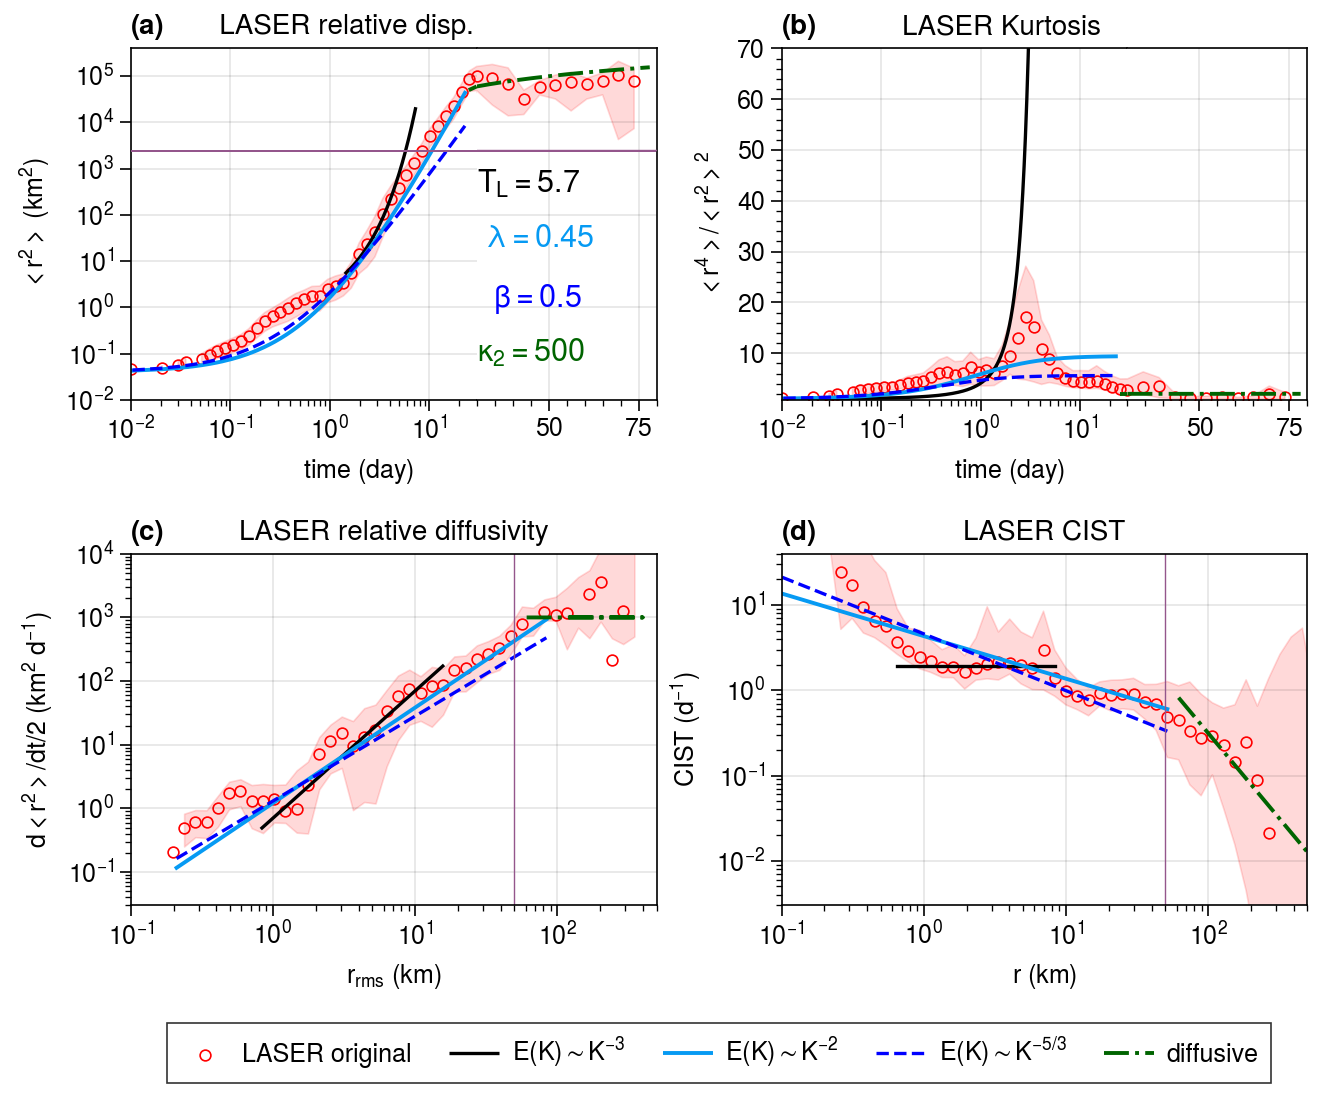

In [5]:
# RD, K2, Kurtosis, CIST for LASER original
import proplot as pplt
from plot import panel

sz, lw = 15, 0.6

fig, axes = pplt.subplots(nrows=2, ncols=2, figsize=(6.6, 5.5), facecolor='w', sharex=0, sharey=0, wspace=5)

offst = 18
params1 = {'T':5.7, 'beta':0.5, 'k2':500, 'r0':r0_las, 'lambda':0.45}

def addTexts(ax, x, y, params):
    ax.text(x, y      , f'$T_L={params["T"]}$'            , fontsize=11, color='k')
    ax.text(x, y/1.5e1, f' $\\lambda={params["lambda"]}$' , fontsize=11, color='azure')
    ax.text(x, y/3e2  , f'  $\\beta={params["beta"]}$'    , fontsize=11, color='b')
    ax.text(x, y/4.5e3, f'$\\kappa_2={params["k2"]}$'     , fontsize=11, color='darkgreen')

r2_lund1 = rd.analytic_r2(rL_o, params1, 'Lundgren')
r2_Rich1 = rd.analytic_r2(rL_o, params1, 'Richardson')
r2_Rayl1 = rd.analytic_r2(rL_o, params1, 'Rayleigh')
r2_GM1   = rd.analytic_r2(rL_o, params1, '-2')
K2_lund1 = rd.analytic_K2(rL_o, params1, 'Lundgren')
K2_Rich1 = rd.analytic_K2(rL_o, params1, 'Richardson')
K2_Rayl1 = rd.analytic_K2(rL_o, params1, 'Rayleigh')
K2_GM1   = rd.analytic_K2(rL_o, params1, '-2')
Ku_lund1 = rd.analytic_Kurtosis(rL_o, params1, 'Lundgren')
Ku_Rich1 = rd.analytic_Kurtosis(rL_o, params1, 'Richardson')
Ku_Rayl1 = rd.analytic_Kurtosis(rL_o, params1, 'Rayleigh')
Ku_GM1   = rd.analytic_Kurtosis(rL_o, params1, '-2')
ci_lund1 = rd.analytic_CIST(dsLRo.r, alpha, params1, 'Lundgren')
ci_Rich1 = rd.analytic_CIST(dsLRo.r, alpha, params1, 'Richardson-a')
ci_Rayl1 = rd.analytic_CIST(dsLRo.r, alpha, params1, 'Rayleigh-a')
ci_GM1   = rd.analytic_CIST(dsLRo.r, alpha, params1, '-2-a')

v111 = {'var':dsLRo.r2, 'r':rL_o, 'CIs':[dsLRo.CILr, dsLRo.CIUr], 'method':'scatter', 'label':'LASER original', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v115 = {'var':r2_lund1[140:700]*offst, 'r':rL_o[140:700], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid', 'color':'k'}
v116 = {'var':r2_Rich1[:2200], 'r':rL_o[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v117 = {'var':r2_Rayl1[2400:], 'r':rL_o[2400:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'darkgreen'}
v118 = {'var':r2_GM1[:2200]  , 'r':rL_o[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

v121 = {'var':dsLRo.Ku, 'r':rL_o, 'CIs':[dsLRo.CILKu, dsLRo.CIUKu], 'method':'scatter', 'label':'LASER original', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v125 = {'var':Ku_lund1[:900] , 'r':rL_o[:900] , 'method':'plot', 'label':'$E(K)\\sim K^{-3}$'  , 'lw':1.2, 'linestyle':'solid' , 'color':'k'}
v126 = {'var':Ku_Rich1[:2200], 'r':rL_o[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v127 = {'var':Ku_Rayl1[2400:], 'r':rL_o[2400:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'darkgreen'}
v128 = {'var':Ku_GM1[:2200]  , 'r':rL_o[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

RCILK2_o1, RCIUK2_o1 = dsLRo.CILK2t.where(dsLRo.CILK2t>0).interpolate_na('time'), dsLRo.CIUK2t.where(dsLRo.CIUK2t>0).interpolate_na('time')

v131 = {'var':dsLRo.K2t, 'r':rL_o, 'CIs':[RCILK2_o1, RCIUK2_o1], 'method':'scatter', 'label':'LASER original', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v135 = {'var':K2_lund1[30:450], 'r':rL_o[30:450], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid', 'color':'k'}
v136 = {'var':K2_Rich1[:1200], 'r':rL_o[:1200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v137 = {'var':K2_Rayl1[1000:], 'r':rL_o[1000:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'darkgreen'}
v138 = {'var':K2_GM1[:1200]  , 'r':rL_o[:1200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

RCILci_o1, RCIUci_o1 = dsLRo.CILci, dsLRo.CIUci

v141 = {'var':dsLRo.cist1, 'r':dsLRo.r, 'CIs':[RCILci_o1, RCIUci_o1], 'method':'scatter', 'label':'LASER original', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v145 = {'var':ci_lund1[35:50], 'r':dsLRo.r[35:50], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$'  , 'lw':1.2, 'linestyle':'solid' , 'color':'k'}
v146 = {'var':ci_Rich1[:60]  , 'r':dsLRo.r[:60]  , 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v147 = {'var':ci_Rayl1[60:]  , 'r':dsLRo.r[60:]  , 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'darkgreen'}
v148 = {'var':ci_GM1[:60]    , 'r':dsLRo.r[:60]  , 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

ax = panel(axes[0,0], [v111], [v115,v118,v116,v117], title=' \t\t\t\t\t\t\t\t\t LASER relative disp.', timebased=True, yscale='log', xscale='semilog',
           ylim=[1e-2, 4e5], xlim=[1e-2, 80], rebins=tbins, ylabel='$<r^2>$ ($km^2$)', xlabel='                $time$ (day)', loc=None, fontsize=10, thre=30, size=0.9)
addTexts(ax[1], 30, 3e2, params1)
ax[1].text(-66, 1700, '—————————————————————', color='purple')
ax[0].plot([-100, 1e3], [2500, 2500], lw=0.5, linestyle='solid', color='purple', zorder=5)
ax = panel(axes[0,1], [v121], [v125,v128,v126,v127], title=' \t\t\t\t\t\t\t\t\t\t LASER Kurtosis', timebased=True, yscale='linear', xscale='semilog',
           ylim=[8e-1, 70], xlim=[1e-2, 80], rebins=tbins, ylabel='$<r^4>/<r^2>^2$', xlabel='                $time$ (day)', loc=None, fontsize=10, thre=30, size=0.9)
ax = panel(axes[1,0], [v131], [v135,v138,v136,v137], title=f'LASER relative diffusivity', timebased=False, yscale='log', xscale='log',
           ylim=[3e-2, 1e4], xlim=[1e-1, 5e2], rebins=sbins, ylabel='$d<r^2>/dt/2$ ($km^2$ $d^{-1}$)', xlabel='$r_{rms}$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [1e-5, 1e4], lw=0.5, linestyle='solid', color='purple')
ax = panel(axes[1,1], [v141], [v145,v148,v146,v147], title=f'LASER CIST', timebased=False, yscale='log', xscale='log',
           ylim=[3e-3, 4e1], xlim=[1e-1, 5e2], ylabel='CIST ($d^{-1}$)', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [1e-5, 1e2], lw=0.5, linestyle='solid', color='purple')
lgd = ax[2]
fig.legend(lgd, loc='b', ncols=5)
axes.format(abc='(a)')
#fig.savefig('fig04.pdf', format='pdf', bbox_inches='tight')

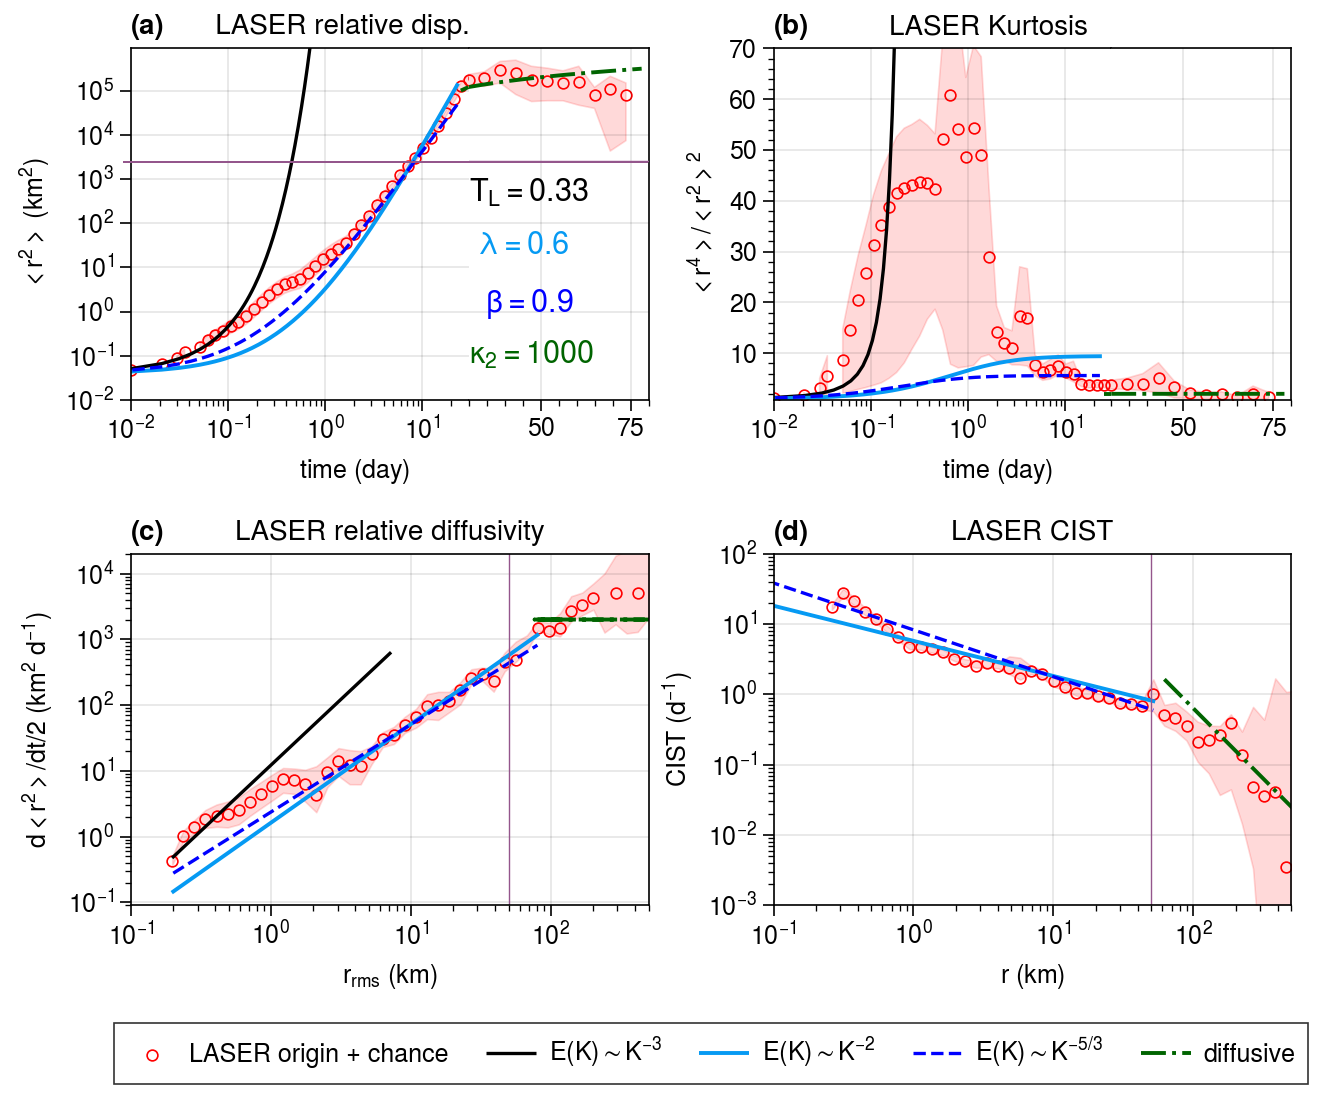

In [19]:
# RD, K2, Kurtosis, CIST for LASER chance
import proplot as pplt
from plot import panel

sz, lw = 15, 0.6

fig, axes = pplt.subplots(nrows=2, ncols=2, figsize=(6.6, 5.5), facecolor='w', sharex=0, sharey=0, wspace=5)

offst = 18
params1 = {'T':0.33, 'beta':0.9, 'k2':1000, 'r0':r0_las, 'lambda':0.6}

def addTexts(ax, x, y, params):
    ax.text(x, y      , f'$T_L={params["T"]}$'            , fontsize=11, color='k')
    ax.text(x, y/1.5e1, f' $\\lambda={params["lambda"]}$' , fontsize=11, color='azure')
    ax.text(x, y/3e2  , f'  $\\beta={params["beta"]}$'    , fontsize=11, color='b')
    ax.text(x, y/4.5e3, f'$\\kappa_2={params["k2"]}$'     , fontsize=11, color='darkgreen')

r2_lund1 = rd.analytic_r2(rL_a, params1, 'Lundgren')
r2_Rich1 = rd.analytic_r2(rL_a, params1, 'Richardson')
r2_Rayl1 = rd.analytic_r2(rL_a, params1, 'Rayleigh')
r2_GM1   = rd.analytic_r2(rL_a, params1, '-2')
K2_lund1 = rd.analytic_K2(rL_a, params1, 'Lundgren')
K2_Rich1 = rd.analytic_K2(rL_a, params1, 'Richardson')
K2_Rayl1 = rd.analytic_K2(rL_a, params1, 'Rayleigh')
K2_GM1   = rd.analytic_K2(rL_a, params1, '-2')
Ku_lund1 = rd.analytic_Kurtosis(rL_a, params1, 'Lundgren')
Ku_Rich1 = rd.analytic_Kurtosis(rL_a, params1, 'Richardson')
Ku_Rayl1 = rd.analytic_Kurtosis(rL_a, params1, 'Rayleigh')
Ku_GM1   = rd.analytic_Kurtosis(rL_a, params1, '-2')
ci_lund1 = rd.analytic_CIST(dsLRa.r, alpha, params1, 'Lundgren')
ci_Rich1 = rd.analytic_CIST(dsLRa.r, alpha, params1, 'Richardson-a')
ci_Rayl1 = rd.analytic_CIST(dsLRa.r, alpha, params1, 'Rayleigh-a')
ci_GM1   = rd.analytic_CIST(dsLRa.r, alpha, params1, '-2-a')

v112 = {'var':dsLRa.r2, 'r':rL_a, 'CIs':[dsLRa.CILr, dsLRa.CIUr], 'method':'scatter', 'label':'LASER chance', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v115 = {'var':r2_lund1[:300] , 'r':rL_a[:300] , 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid', 'color':'k'}
v116 = {'var':r2_Rich1[:2200], 'r':rL_a[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v117 = {'var':r2_Rayl1[2400:], 'r':rL_a[2400:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'darkgreen'}
v118 = {'var':r2_GM1[:2200]  , 'r':rL_a[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

v122 = {'var':dsLRa.Ku, 'r':rL_a, 'CIs':[dsLRa.CILKu, dsLRa.CIUKu], 'method':'scatter', 'label':'LASER chance', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v125 = {'var':Ku_lund1[:900] , 'r':rL_a[:900] , 'method':'plot', 'label':'$E(K)\\sim K^{-3}$'  , 'lw':1.2, 'linestyle':'solid' , 'color':'k'}
v126 = {'var':Ku_Rich1[:2200], 'r':rL_a[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v127 = {'var':Ku_Rayl1[2400:], 'r':rL_a[2400:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'darkgreen'}
v128 = {'var':Ku_GM1[:2200]  , 'r':rL_a[:2200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

RCILK2_a1, RCIUK2_a1 = dsLRa.CILK2t.where(dsLRa.CILK2t>0).interpolate_na('time'), dsLRa.CIUK2t.where(dsLRa.CIUK2t>0).interpolate_na('time')

v132 = {'var':dsLRa.K2t, 'r':rL_a, 'CIs':[RCILK2_a1, RCIUK2_a1], 'method':'scatter', 'label':'LASER chance', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v135 = {'var':K2_lund1[:200] , 'r':rL_a[:200] , 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid', 'color':'k'}
v136 = {'var':K2_Rich1[:1200], 'r':rL_a[:1200], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v137 = {'var':K2_Rayl1[1200:], 'r':rL_a[1200:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'darkgreen'}
v138 = {'var':K2_GM1[:1200]  , 'r':rL_a[:1200], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

RCILci_a1, RCIUci_a1 = dsLRa.CILci, dsLRa.CIUci

v142 = {'var':dsLRa.cist1, 'r':dsLRa.r, 'CIs':[RCILci_a1, RCIUci_a1], 'method':'scatter', 'label':'LASER origin + chance', 'lw':lw, 's':sz, 'edgecolor':'r', 'facecolor':'none'}
v145 = {'var':ci_lund1[:10], 'r':dsLRa.r[:10], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$'  , 'lw':1.2, 'linestyle':'solid' , 'color':'k'}
v146 = {'var':ci_Rich1[:60], 'r':dsLRa.r[:60], 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.2, 'linestyle':'dashed', 'color':'b'}
v147 = {'var':ci_Rayl1[60:], 'r':dsLRa.r[60:], 'method':'plot', 'label':'diffusive'  , 'lw':1.4, 'linestyle':'dashdot', 'color':'darkgreen'}
v148 = {'var':ci_GM1[:60]  , 'r':dsLRa.r[:60], 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.4, 'linestyle':'solid', 'color':'azure'}

ax = panel(axes[0,0], [v112], [v115,v118,v116,v117], title=' \t\t\t\t\t\t\t\t\t LASER relative disp.', timebased=True, yscale='log', xscale='semilog',
           ylim=[1e-2, 9e5], xlim=[1e-2, 80], rebins=tbins, ylabel='$<r^2>$ ($km^2$)', xlabel='                $time$ (day)', loc=None, fontsize=10, thre=30, size=0.9)
addTexts(ax[1], 30, 3e2, params1)
ax[1].text(-66, 1690, '—————————————————————', color='purple')
ax[0].plot([-100, 1e3], [2500, 2500], lw=0.5, linestyle='solid', color='purple', zorder=5)
ax = panel(axes[0,1], [v122], [v125,v128,v126,v127], title=' \t\t\t\t\t\t\t\t\t\t LASER Kurtosis', timebased=True, yscale='linear', xscale='semilog',
           ylim=[8e-1, 70], xlim=[1e-2, 80], rebins=tbins, ylabel='$<r^4>/<r^2>^2$', xlabel='                $time$ (day)', loc=None, fontsize=10, thre=30, size=0.9)
ax = panel(axes[1,0], [v132], [v135,v138,v136,v137], title=f'LASER relative diffusivity', timebased=False, yscale='log', xscale='log',
           ylim=[9e-2, 2e4], xlim=[1e-1, 5e2], rebins=sbins, ylabel='$d<r^2>/dt/2$ ($km^2$ $d^{-1}$)', xlabel='$r_{rms}$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [1e-5, 5e4], lw=0.5, linestyle='solid', color='purple')
ax = panel(axes[1,1], [v142], [v145,v148,v146,v147], title=f'LASER CIST', timebased=False, yscale='log', xscale='log',
           ylim=[1e-3, 1e2], xlim=[1e-1, 5e2], ylabel='CIST ($d^{-1}$)', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [1e-5, 1e2], lw=0.5, linestyle='solid', color='purple')
lgd = ax[2]
fig.legend(lgd, loc='b', ncols=5)
axes.format(abc='(a)')
#fig.savefig('fig06.pdf', format='pdf', bbox_inches='tight')

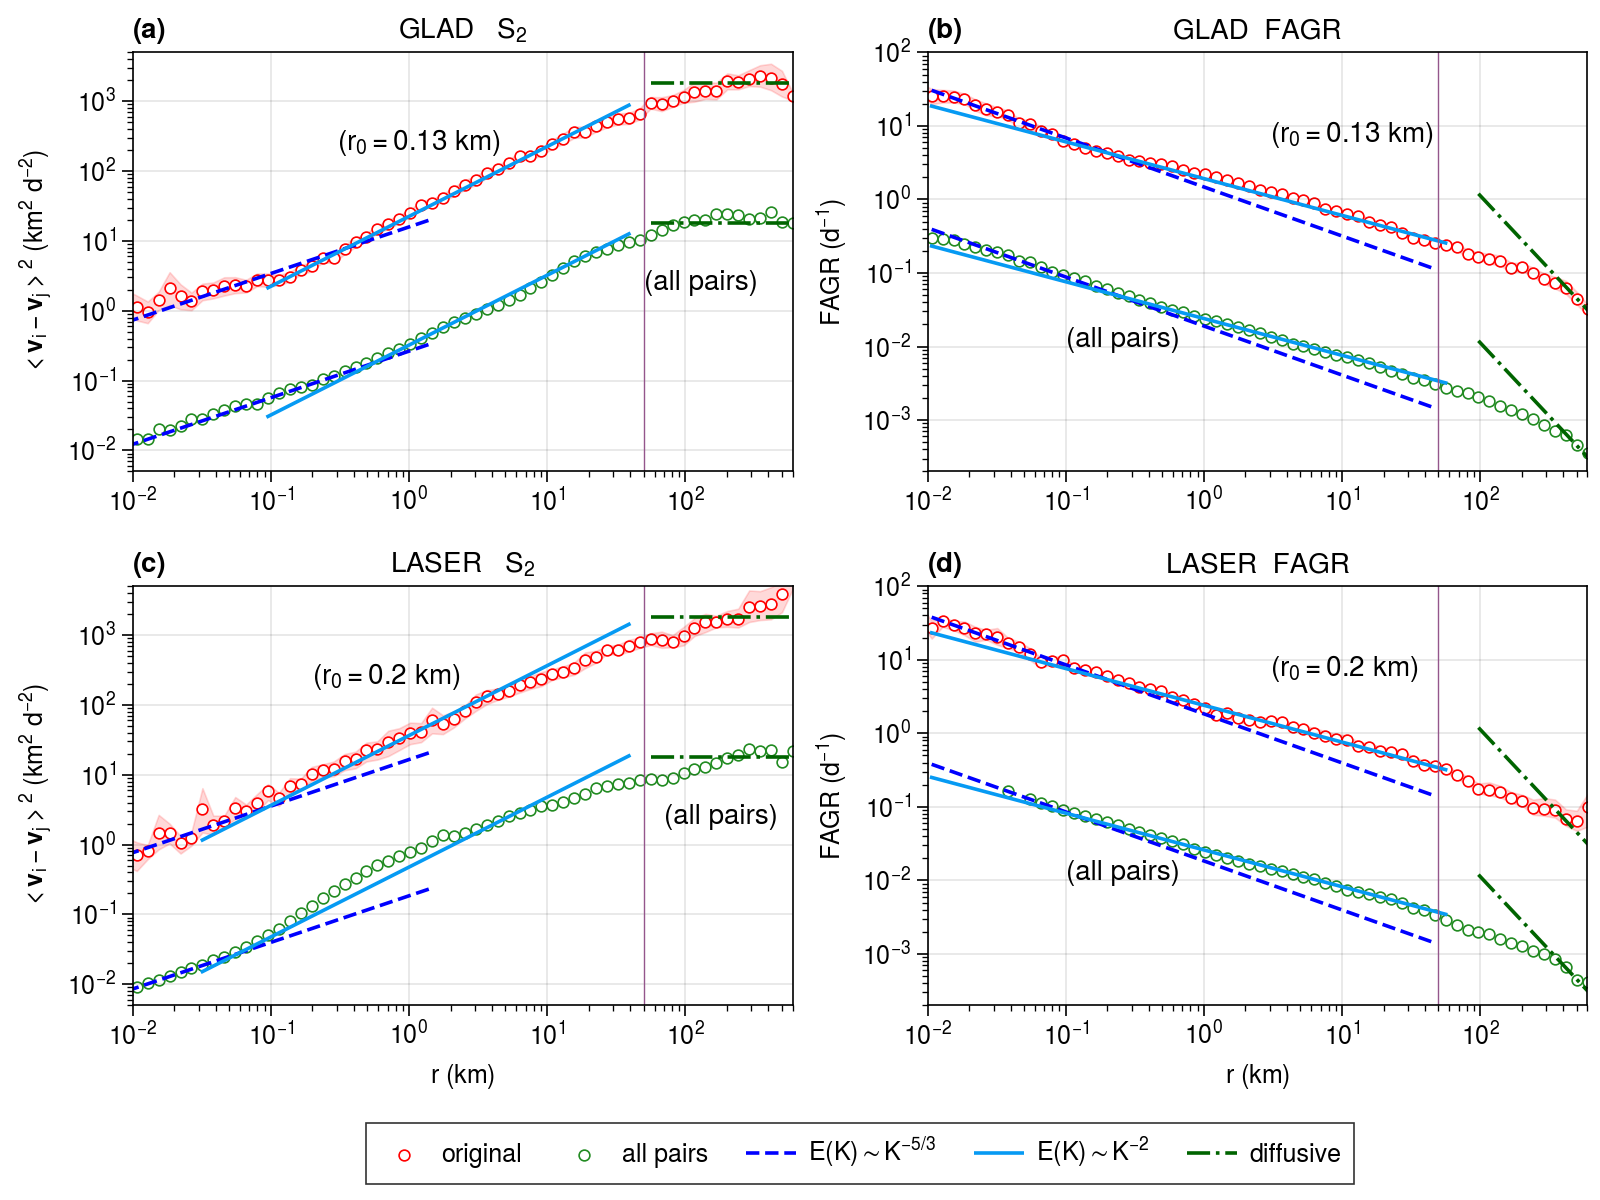

In [20]:
# S2, S3, FSLE for both GLAD and LASER
import proplot as pplt
from plot import panel

unitscale2 = (86.4)**2.0
unitscale3 = (86.4)**3.0
sz, lw = 15, 0.6

rngRi = slice(3e-3, 1.5)
rngGM = slice(0.08, 40)
rngRa = slice(50, 1000)
S2G_lunda1 = rd.analytic_S2(dsGRAl.rbin, {'T': 0.7}, 'Lundgren')
S2G_Richa1 = rd.analytic_S2(dsGRAl.rbin, {'beta': 6.6}, 'Richardson')
S2G_Rayla1 = rd.analytic_S2(dsGRAl.rbin, {'k2'  :1800}, 'Rayleigh')
S2G_GM1    = rd.analytic_S2(dsGRAl.rbin, {'lambda': 14}, '-2')
vS2G1 = {'var':dsGRo.S2r*unitscale2, 'r':dsGRo.rbin, 'CIs':[dsGRo.CILS2r*unitscale2, dsGRo.CIUS2r*unitscale2], 'method':'scatter', 'label':'original', 's':sz, 'lw':lw, 'edgecolor':'r', 'facecolor':'w'}
vS2G3 = {'var':dsGRAl.S2*unitscale2/100, 'r':dsGRAl.rbin, 'method':'scatter', 'label':'all possible', 's':sz, 'lw':lw, 'edgecolor':'forestgreen', 'facecolor':'w', 'marker':'o'}
vS2G4 = {'var':S2G_lunda1[250:1000] , 'r':dsGRAl.rbin[250:1000], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid' , 'color':'k'}
vS2G5 = {'var':S2G_Richa1.sel(rbin=rngRi) *2.4, 'r':dsGRAl.rbin.sel(rbin=rngRi), 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.3, 'linestyle':'dashed', 'color':'b'}
vS2G6 = {'var':S2G_Rayla1.sel(rbin=rngRa)    , 'r':dsGRAl.rbin.sel(rbin=rngRa), 'method':'plot', 'label':'diffusive', 'lw':1.3, 'linestyle':'dashdot', 'color':'darkgreen'}
vS2G7 = {'var':S2G_GM1.sel(rbin=rngGM)    *1.6, 'r':dsGRAl.rbin.sel(rbin=rngGM), 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.3, 'linestyle':'solid' , 'color':'azure'}
vS2G55= {'var':S2G_Richa1.sel(rbin=rngRi) *4/100, 'r':dsGRAl.rbin.sel(rbin=rngRi), 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.3, 'linestyle':'dashed', 'color':'b'}
vS2G66= {'var':S2G_Rayla1.sel(rbin=rngRa)    /100, 'r':dsGRAl.rbin.sel(rbin=rngRa), 'method':'plot', 'label':'diffusive', 'lw':1.3, 'linestyle':'dashdot', 'color':'darkgreen'}
vS2G77= {'var':S2G_GM1.sel(rbin=rngGM)    *2.3/100, 'r':dsGRAl.rbin.sel(rbin=rngGM), 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.3, 'linestyle':'solid' , 'color':'azure'}

rngRi = slice(1e-2, 55)
rngGM = slice(1e-2, 65)
rngRa = slice(90, 1000)
fsleG_lunda = rd.analytic_CIST(dsGRAl.rbin, alpha, {'T': 11}, 'Lundgren')
fsleG_Richa = rd.analytic_CIST(dsGRAl.rbin, alpha, {'beta': 0.23}, 'Richardson-a')
fsleG_Rayla = rd.analytic_CIST(dsGRAl.rbin, alpha, {'k2': 1800}, 'Rayleigh-a')
fsleG_GM    = rd.analytic_CIST(dsGRAl.rbin, alpha, {'lambda': 0.5}, '-2-a')
vFG1  = {'var':dsGRo.FSLE     , 'r':dsGRo.rbin , 'CIs':[dsGRo.CILFSLE, dsGRo.CIUFSLE], 'method':'scatter', 'label':'original', 's':sz+1, 'lw':lw, 'color':'forestgreen', 'marker':'x'}
vFG3  = {'var':dsGRAl.FSLE/100, 'r':dsGRAl.rbin, 'method':'scatter', 'label':'all possible', 's':sz+1, 'lw':lw, 'color':'r', 'marker':'x'}
vFGP1 = {'var':dsGRo.FAGRp, 'r':dsGRo.rbin , 'CIs':[dsGRo.CILFGp, dsGRo.CIUFGp], 'method':'scatter', 'label':'original', 's':sz, 'lw':lw, 'edgecolor':'r', 'facecolor':'w', 'marker':'o'}
vFGP3 = {'var':dsGRAl.FAGRp/100, 'r':dsGRAl.rbin, 'method':'scatter', 'label':'all possible', 's':sz, 'lw':lw, 'edgecolor':'forestgreen', 'facecolor':'w', 'marker':'o'}
vFG4  = {'var':fsleG_lunda[23:37],'r':dsGRAl.rbin[23:37], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid', 'color':'k'}
vFG5  = {'var':fsleG_Richa.sel(rbin=rngRi)*0.7, 'r':dsGRAl.rbin.sel(rbin=rngRi), 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.3, 'linestyle':'dashed', 'color':'b'}
vFG6  = {'var':fsleG_Rayla.sel(rbin=rngRa)*1.0, 'r':dsGRAl.rbin.sel(rbin=rngRa), 'method':'plot', 'label':'diffusive', 'lw':1.3, 'linestyle':'dashdot', 'color':'darkgreen'}
vFG7  = {'var':fsleG_GM.sel(rbin=rngGM)   *0.4, 'r':dsGRAl.rbin.sel(rbin=rngGM), 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.3, 'linestyle':'solid', 'color':'azure'}
vFG55 = {'var':fsleG_Richa.sel(rbin=rngRi)*0.9/100, 'r':dsGRAl.rbin.sel(rbin=rngRi), 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.3, 'linestyle':'dashed', 'color':'b'}
vFG66 = {'var':fsleG_Rayla.sel(rbin=rngRa)*1.0/100, 'r':dsGRAl.rbin.sel(rbin=rngRa), 'method':'plot', 'label':'diffusive', 'lw':1.3, 'linestyle':'dashdot', 'color':'darkgreen'}
vFG77 = {'var':fsleG_GM.sel(rbin=rngGM)   *0.5/100, 'r':dsGRAl.rbin.sel(rbin=rngGM), 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.3, 'linestyle':'solid', 'color':'azure'}

rngRi = slice(1e-3, 1.5)
rngGM = slice(3e-2, 40)
rngRa = slice(50, 1000)
S2L_lunda1 = rd.analytic_S2(dsLRo.rbin, {'T': 0.7}, 'Lundgren')
S2L_Richa1 = rd.analytic_S2(dsLRo.rbin, {'beta': 6.6}, 'Richardson')
S2L_Rayla1 = rd.analytic_S2(dsLRo.rbin, {'k2'  :1800}, 'Rayleigh')
S2L_GM1    = rd.analytic_S2(dsLRo.rbin, {'lambda': 14}, '-2')
vS2L1 = {'var':dsLRo.S2r*unitscale2, 'r':dsLRo.rbin, 'CIs':[dsLRo.CILS2r*unitscale2, dsLRo.CIUS2r*unitscale2], 'method':'scatter', 'label':'original', 's':sz, 'lw':lw, 'edgecolor':'r', 'facecolor':'w'}
vS2L3 = {'var':dsLRAl.S2*unitscale2/100, 'r':dsLRAl.rbin, 'method':'scatter', 'label':'all pairs', 's':sz, 'lw':lw, 'edgecolor':'forestgreen', 'facecolor':'w', 'marker':'o'}
vS2L4 = {'var':S2L_lunda1[25:50] , 'r':dsLRo.rbin[25:50], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid' , 'color':'k'}
vS2L5 = {'var':S2L_Richa1.sel(rbin=rngRi) *2.5, 'r':dsLRo.rbin.sel(rbin=rngRi), 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.3, 'linestyle':'dashed', 'color':'b'}
vS2L6 = {'var':S2L_Rayla1.sel(rbin=rngRa)     , 'r':dsLRo.rbin.sel(rbin=rngRa), 'method':'plot', 'label':'diffusive', 'lw':1.3, 'linestyle':'dashdot', 'color':'darkgreen'}
vS2L7 = {'var':S2L_GM1.sel(rbin=rngGM)    *2.6, 'r':dsLRo.rbin.sel(rbin=rngGM), 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.3, 'linestyle':'solid' , 'color':'azure'}
vS2L55= {'var':S2L_Richa1.sel(rbin=rngRi) *2.8/100, 'r':dsLRo.rbin.sel(rbin=rngRi), 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.3, 'linestyle':'dashed', 'color':'b'}
vS2L66= {'var':S2L_Rayla1.sel(rbin=rngRa)    /100 , 'r':dsLRo.rbin.sel(rbin=rngRa), 'method':'plot', 'label':'diffusive', 'lw':1.3, 'linestyle':'dashdot', 'color':'darkgreen'}
vS2L77= {'var':S2L_GM1.sel(rbin=rngGM)    *3.4/100, 'r':dsLRo.rbin.sel(rbin=rngGM), 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.3, 'linestyle':'solid' , 'color':'azure'}

rngRi = slice(1e-2, 55)
rngGM = slice(1e-2, 65)
rngRa = slice(90, 1000)
fsleL_lunda = rd.analytic_CIST(dsLRAl.rbin, alpha, {'T': 11}, 'Lundgren')
fsleL_Richa = rd.analytic_CIST(dsLRAl.rbin, alpha, {'beta': 0.23}, 'Richardson-a')
fsleL_Rayla = rd.analytic_CIST(dsLRAl.rbin, alpha, {'k2': 1800}, 'Rayleigh-a')
fsleL_GM    = rd.analytic_CIST(dsLRAl.rbin, alpha, {'lambda': 0.5}, '-2-a')
vFL1 = {'var':dsLRo.FSLE, 'r':dsLRo.rbin , 'CIs':[dsLRo.CILFSLE, dsLRo.CIUFSLE], 'method':'scatter', 'label':'FSLE original', 's':sz+1, 'lw':lw, 'color':'forestgreen', 'marker':'x'}
vFL3 = {'var':dsLRAl.FSLE/100, 'r':dsLRAl.rbin, 'method':'scatter', 'label':'FSLE all pairs', 's':sz+1, 'lw':lw, 'color':'r', 'marker':'x'}
vFLP1 = {'var':dsLRo.FAGRp, 'r':dsLRo.rbin , 'CIs':[dsLRo.CILFGp, dsLRo.CIUFGp], 'method':'scatter', 'label':'original', 's':sz, 'lw':lw, 'edgecolor':'r', 'facecolor':'w', 'marker':'o'}
vFLP3 = {'var':dsLRAl.FAGRp/100, 'r':dsLRAl.rbin, 'method':'scatter', 'label':'all pairs', 's':sz, 'lw':lw, 'edgecolor':'forestgreen', 'facecolor':'w', 'marker':'o'}
vFL4 = {'var':fsleL_lunda[23:37],'r':dsLRAl.rbin[23:37], 'method':'plot', 'label':'$E(K)\\sim K^{-3}$', 'lw':1.2, 'linestyle':'solid', 'color':'k'}
vFL5 = {'var':fsleL_Richa.sel(rbin=rngRi)*0.87, 'r':dsLRAl.rbin.sel(rbin=rngRi), 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.3, 'linestyle':'dashed', 'color':'b'}
vFL6 = {'var':fsleL_Rayla.sel(rbin=rngRa)    , 'r':dsLRAl.rbin.sel(rbin=rngRa), 'method':'plot', 'label':'diffusive', 'lw':1.3, 'linestyle':'dashdot', 'color':'darkgreen'}
vFL7 = {'var':fsleL_GM.sel(rbin=rngGM)   *0.5, 'r':dsLRAl.rbin.sel(rbin=rngGM), 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.3, 'linestyle':'solid', 'color':'azure'}
vFL55= {'var':fsleL_Richa.sel(rbin=rngRi)*0.87/100, 'r':dsLRAl.rbin.sel(rbin=rngRi), 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.3, 'linestyle':'dashed', 'color':'b'}
vFL66= {'var':fsleL_Rayla.sel(rbin=rngRa)    /100, 'r':dsLRAl.rbin.sel(rbin=rngRa), 'method':'plot', 'label':'diffusive', 'lw':1.3, 'linestyle':'dashdot', 'color':'darkgreen'}
vFL77= {'var':fsleL_GM.sel(rbin=rngGM)   *0.54/100, 'r':dsLRAl.rbin.sel(rbin=rngGM), 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.3, 'linestyle':'solid', 'color':'azure'}

fig, axes = pplt.subplots(nrows=2, ncols=2, figsize=(8, 6.0), facecolor='w', sharex=0, sharey=0, wspace=5.4)

ax = panel(axes[0,0], [vS2G1,vS2G3], [vS2G5,vS2G6,vS2G7,vS2G55,vS2G66,vS2G77], title=f'GLAD   $S_2$',
           timebased=False, yscale='log', xscale='log', ylim=[5e-3, 5e3], xlim=[1e-2, 6e2], rebins=None,
           ylabel='$<\\mathbf{v}_i - \\mathbf{v}_j>^2$ ($km^2$ $d^{-2}$)', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [0, 1e4], lw=0.5, linestyle='solid', color='purple')
ax[0].text(0.3, 200, '($r_0=$0.13 km)', fontsize=10)
ax[0].text(50, 2, '(all pairs)', fontsize=10)
ax[0].set_xlabel('')
ax = panel(axes[0,1], [vFGP1,vFGP3], [vFG5,vFG6,vFG7,vFG55,vFG66,vFG77], title=f'GLAD  FAGR',
           timebased=False, yscale='log', xscale='log', ylim=[2e-4, 1e2], xlim=[1e-2, 6e2], rebins=None,
           ylabel='FAGR ($d^{-1}$)', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [0, 1e4], lw=0.5, linestyle='solid', color='purple')
ax[0].text(3, 6, '($r_0=$0.13 km)', fontsize=10)
ax[0].text(0.1, 0.01, '(all pairs)', fontsize=10)
ax[0].set_xlabel('')
ax = panel(axes[1,0], [vS2L1,vS2L3], [vS2L5,vS2L6,vS2L7,vS2L55,vS2L66,vS2L77], title=f'LASER   $S_2$',
           timebased=False, yscale='log', xscale='log', ylim=[5e-3, 5e3], xlim=[1e-2, 6e2], rebins=None,
           ylabel='$<\\mathbf{v}_i - \\mathbf{v}_j>^2$ ($km^2$ $d^{-2}$)', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [0, 1e4], lw=0.5, linestyle='solid', color='purple')
ax[0].text(0.2, 200, '($r_0=$0.2 km)', fontsize=10)
ax[0].text(70, 2, '(all pairs)', fontsize=10)
ax = panel(axes[1,1], [vFLP1,vFLP3], [vFL5,vFL6,vFL7,vFL55,vFL66,vFL77], title=f'LASER  FAGR',
           timebased=False, yscale='log', xscale='log', ylim=[2e-4, 1e2], xlim=[1e-2, 6e2], rebins=None,
           ylabel='FAGR ($d^{-1}$)', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [0, 1e4], lw=0.5, linestyle='solid', color='purple')
ax[0].text(3, 6, '($r_0=$0.2 km)', fontsize=10)
ax[0].text(0.1, 0.01, '(all pairs)', fontsize=10)
lgd = ax[2]
lgd = [lgd[0], lgd[1], lgd[2], lgd[4], lgd[3]]
fig.legend(lgd, loc='b', ncols=5, cols=(1,2))
axes.format(abc='(a)')
#fig.savefig('fig08_R1.pdf', format='pdf', bbox_inches='tight')

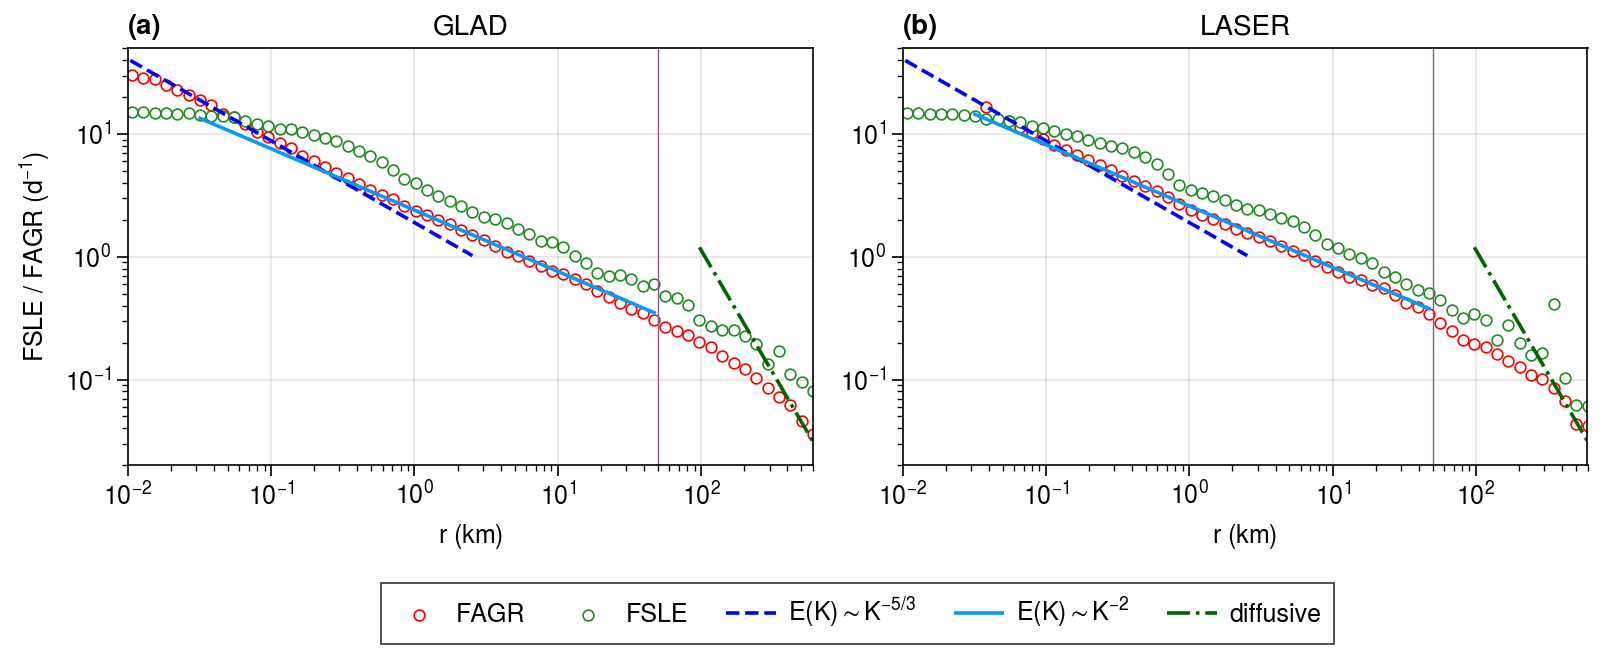

In [21]:
# S2, S3, FSLE for both GLAD and LASER
import proplot as pplt
from plot import panel

unitscale2 = (86.4)**2.0
unitscale3 = (86.4)**3.0
sz, lw = 15, 0.6

rngRi = slice(3e-3, 3)
rngGM = slice(3e-2, 50)
rngRa = slice(90, 1000)
fsleG_Richa = rd.analytic_CIST(dsGRAl.rbin, alpha, {'beta': 0.23}, 'Richardson-a')
fsleG_Rayla = rd.analytic_CIST(dsGRAl.rbin, alpha, {'k2': 1800}, 'Rayleigh-a')
fsleG_GM    = rd.analytic_CIST(dsGRAl.rbin, alpha, {'lambda': 0.5}, '-2-a')
vFG1 = {'var':dsGRAl.FSLE    , 'r':dsGRAl.rbin, 'method':'scatter', 'label':'FSLE', 's':sz, 'lw':lw, 'edgecolor':'forestgreen', 'facecolor':'w', 'marker':'o'}
vFG2 = {'var':dsGRAl.FSLE_int, 'r':dsGRAl.rbin, 'method':'scatter', 'label':'FSLE (interp)', 's':sz, 'lw':lw, 'edgecolor':'r', 'facecolor':'w', 'marker':'o'}
vFG3 = {'var':dsGRAl.FAGRp   , 'r':dsGRAl.rbin, 'method':'scatter', 'label':'FAGR', 's':sz, 'lw':lw, 'edgecolor':'r', 'facecolor':'w', 'marker':'o'}
vFG5 = {'var':fsleG_Richa.sel(rbin=rngRi)*0.9, 'r':dsGRAl.rbin.sel(rbin=rngRi), 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.3, 'linestyle':'dashed', 'color':'b'}
vFG6 = {'var':fsleG_Rayla.sel(rbin=rngRa)*1.0, 'r':dsGRAl.rbin.sel(rbin=rngRa), 'method':'plot', 'label':'diffusive', 'lw':1.3, 'linestyle':'dashdot', 'color':'darkgreen'}
vFG7 = {'var':fsleG_GM.sel(rbin=rngGM)   *0.5, 'r':dsGRAl.rbin.sel(rbin=rngGM), 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.3, 'linestyle':'solid', 'color':'azure'}

rngRi = slice(3e-3, 3)
rngGM = slice(3e-2, 50)
rngRa = slice(90, 1000)
fsleG_Richa = rd.analytic_CIST(dsLRAl.rbin, alpha, {'beta': 0.23}, 'Richardson-a')
fsleG_Rayla = rd.analytic_CIST(dsLRAl.rbin, alpha, {'k2': 1800}, 'Rayleigh-a')
fsleG_GM    = rd.analytic_CIST(dsLRAl.rbin, alpha, {'lambda': 0.5}, '-2-a')
vFL1 = {'var':dsLRAl.FSLE    , 'r':dsLRAl.rbin, 'method':'scatter', 'label':'FSLE', 's':sz, 'lw':lw, 'edgecolor':'forestgreen', 'facecolor':'w', 'marker':'o'}
vFL2 = {'var':dsLRAl.FSLE_int, 'r':dsLRAl.rbin, 'method':'scatter', 'label':'FSLE (interp)', 's':sz, 'lw':lw, 'edgecolor':'r', 'facecolor':'w', 'marker':'o'}
vFL3 = {'var':dsLRAl.FAGRp   , 'r':dsLRAl.rbin, 'method':'scatter', 'label':'FAGR', 's':sz, 'lw':lw, 'edgecolor':'r', 'facecolor':'w', 'marker':'o'}
vFL5 = {'var':fsleG_Richa.sel(rbin=rngRi)*0.9, 'r':dsGRAl.rbin.sel(rbin=rngRi), 'method':'plot', 'label':'$E(K)\\sim K^{-5/3}$', 'lw':1.3, 'linestyle':'dashed', 'color':'b'}
vFL6 = {'var':fsleG_Rayla.sel(rbin=rngRa)*1.0, 'r':dsGRAl.rbin.sel(rbin=rngRa), 'method':'plot', 'label':'diffusive', 'lw':1.3, 'linestyle':'dashdot', 'color':'darkgreen'}
vFL7 = {'var':fsleG_GM.sel(rbin=rngGM)   *0.54, 'r':dsGRAl.rbin.sel(rbin=rngGM), 'method':'plot', 'label':'$E(K)\\sim K^{-2}$', 'lw':1.3, 'linestyle':'solid', 'color':'azure'}

fig, axes = pplt.subplots(nrows=1, ncols=2, figsize=(8, 3.3), facecolor='w', sharex=0, sharey=0)

ax = panel(axes[0], [vFG3,vFG1], [vFG5,vFG6,vFG7], title=f'GLAD',
           timebased=False, yscale='log', xscale='log', ylim=[2e-2, 5e1], xlim=[1e-2, 6e2], rebins=None,
           ylabel='FSLE / FAGR ($d^{-1}$)', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [0, 1e4], lw=0.5, linestyle='solid', color='purple')

ax = panel(axes[1], [vFL3,vFL1], [vFL5,vFL6,vFL7], title=f'LASER',
           timebased=False, yscale='log', xscale='log', ylim=[2e-2, 5e1], xlim=[1e-2, 6e2], rebins=None,
           ylabel='', xlabel='$r$ (km)', loc=None, fontsize=10)
ax[0].plot([50, 50], [0, 1e4], lw=0.5, linestyle='solid', color='purple')

lgd = ax[2]
lgd = [lgd[0], lgd[1], lgd[2], lgd[4], lgd[3]]
fig.legend(lgd, loc='b', ncols=5)

axes.format(abc='(a)')
#fig.savefig('fig09.pdf', format='pdf', bbox_inches='tight')